<a href="https://colab.research.google.com/github/oyaon/ML-Dengue-Prediction/blob/main/Enhanced_Dhaka_Dengue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Dhaka22-24.csv")
df['Date'] = pd.to_datetime(df['Date'])

# Add rolling averages (7-day rolling)
df['TempMax_7d_avg'] = df['TempMax'].rolling(window=7).mean()
df['TempMin_7d_avg'] = df['TempMin'].rolling(window=7).mean()
df['Humidity_7d_avg'] = df['Humidity'].rolling(window=7).mean()
df['Rainfall_7d_avg'] = df['Rainfall'].rolling(window=7).mean()

# Add cumulative rainfall (30-day cumulative sum)
df['Rainfall_cum_30d'] = df['Rainfall'].rolling(window=30).sum()

# Add interaction terms
df['Temp_Rainfall'] = df['TempMax'] * df['Rainfall']
df['Humidity_Rainfall'] = df['Humidity'] * df['Rainfall']

# Add seasonal indicators
df['Month'] = df['Date'].dt.month
def get_season(month):
    if month in [6, 7, 8, 9]:
        return 'Monsoon'
    elif month in [10, 11]:
        return 'Post-Monsoon'
    elif month in [12, 1, 2]:
        return 'Winter'
    else:
        return 'Summer'

df['Season'] = df['Month'].apply(get_season)


# Convert 'Season' into dummy variables (One-Hot Encoding)
# Removed drop_first=True to keep all season columns
# Moved get_dummies before dropna to ensure 'Season' column is present
df = pd.get_dummies(df, columns=['Season'])

# Drop rows with NaN values caused by rolling averages and cumulative sums
df = df.dropna()

# --- Assuming Lag_Cases needs to be calculated. Replace with your logic to create Lag_Cases column----
# Example: Creating Lag_Cases by shifting the 'Cases' column by 1
df['Lag_Cases'] = df['Cases'].shift(1)

# Drop the first row as it would have NaN for Lag_Cases
df = df.dropna()

# -----------------------------------------------------------------------------------------------------
# Define features and target variable
X = df[['TempMax', 'TempMin', 'Humidity', 'Rainfall', 'Lag_Cases',
        'TempMax_7d_avg', 'Humidity_7d_avg', 'Rainfall_cum_30d',
        'Temp_Rainfall', 'Humidity_Rainfall', 'Season_Monsoon', 'Season_Post-Monsoon', 'Season_Winter']]

y = df['Cases']

In [6]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
from sklearn.ensemble import RandomForestRegressor

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [8]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R-squared (R²):", r2_score(y_test, y_pred))


Mean Squared Error (MSE): 8074.59159624413
R-squared (R²): 0.8873121180403075


In [9]:
# Example future weather data (replace with actual inputs)
future_weather = [[34.5, 25.6, 85, 12.3, 150, 33.0, 80.0, 300.0, 414.0, 1020.0, 1, 0, 0]]

# Predict future dengue cases
future_cases = model.predict(future_weather)
print("Predicted Dengue Cases:", future_cases)


Predicted Dengue Cases: [267.]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# ... (your previous code for data loading and preprocessing) ...

# Define features and target variable
X = df[['TempMax', 'TempMin', 'Humidity', 'Rainfall', 'Lag_Cases',
        'TempMax_7d_avg', 'Humidity_7d_avg', 'Rainfall_cum_30d',
        'Temp_Rainfall', 'Humidity_Rainfall', 'Season_Monsoon', 'Season_Post-Monsoon', 'Season_Winter']]

y = df['Cases']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R-squared (R²):", r2_score(y_test, y_pred))

# Example future weather data (replace with actual inputs)
future_weather = [[34.5, 25.6, 85, 12.3, 150, 33.0, 80.0, 300.0, 414.0, 1020.0, 1, 0, 0]]

# Convert future_weather to DataFrame with correct column names
future_weather_df = pd.DataFrame(future_weather, columns=X.columns)

# Predict future dengue cases
future_cases = model.predict(future_weather_df)  # Use the DataFrame for prediction
print("Predicted Dengue Cases:", future_cases)

Mean Squared Error (MSE): 8074.59159624413
R-squared (R²): 0.8873121180403075
Predicted Dengue Cases: [267.]


In [11]:
# Extract feature importances
importances = model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Display feature importance
print("\nFeature Importances:")
print(importance_df)



Feature Importances:
                Feature  Importance
4             Lag_Cases    0.905112
7      Rainfall_cum_30d    0.016857
6       Humidity_7d_avg    0.016261
1               TempMin    0.011628
5        TempMax_7d_avg    0.010053
2              Humidity    0.009018
11  Season_Post-Monsoon    0.007681
0               TempMax    0.007664
9     Humidity_Rainfall    0.005624
8         Temp_Rainfall    0.004952
3              Rainfall    0.004072
10       Season_Monsoon    0.001012
12        Season_Winter    0.000066


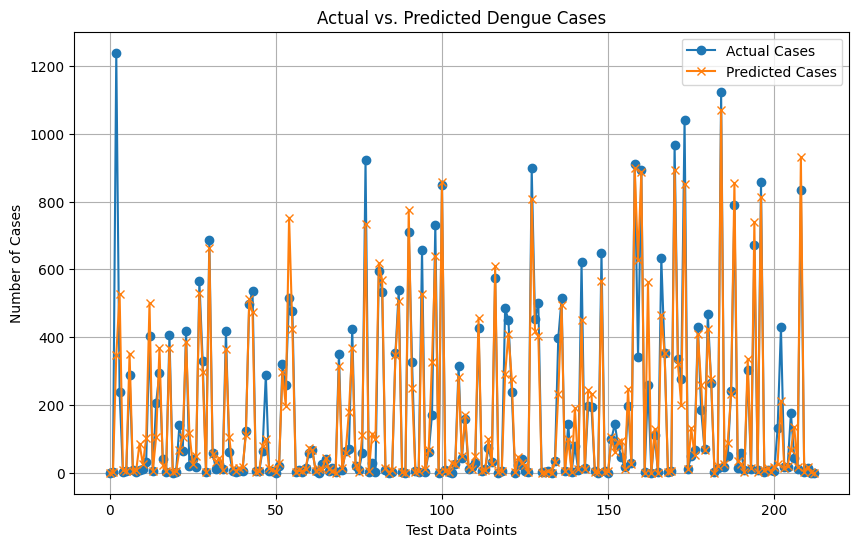

In [12]:
import matplotlib.pyplot as plt

# Plot actual vs. predicted cases
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label="Actual Cases", linestyle='-', marker='o')
plt.plot(y_pred, label="Predicted Cases", linestyle='-', marker='x')
plt.title("Actual vs. Predicted Dengue Cases")
plt.xlabel("Test Data Points")
plt.ylabel("Number of Cases")
plt.legend()
plt.grid()
plt.show()


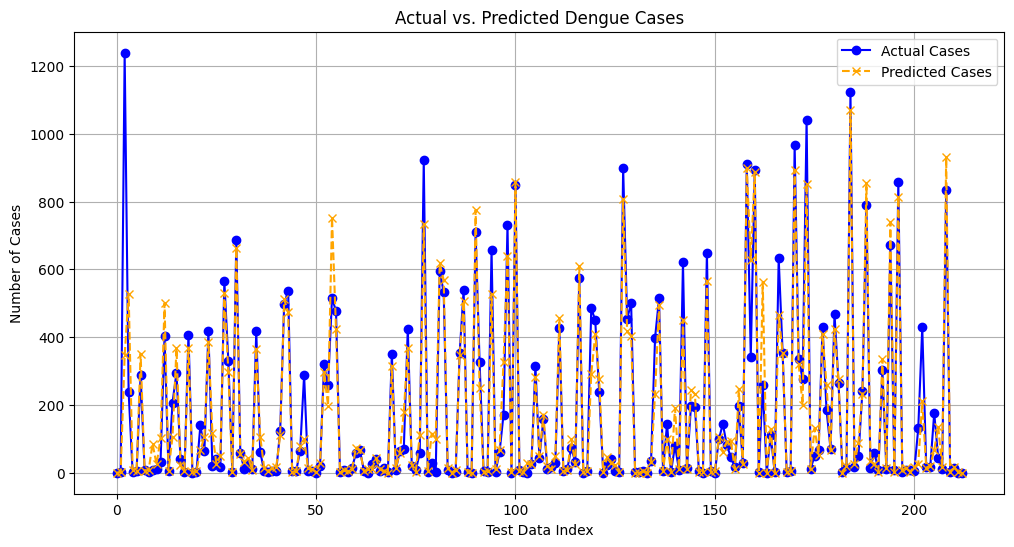

In [24]:
import matplotlib.pyplot as plt

# Actual vs. Predicted cases
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test)), y_test, label="Actual Cases", linestyle='-', marker='o', color='blue')
plt.plot(range(len(y_test)), y_pred, label="Predicted Cases", linestyle='--', marker='x', color='orange')
plt.title("Actual vs. Predicted Dengue Cases")
plt.xlabel("Test Data Index")
plt.ylabel("Number of Cases")
plt.legend()
plt.grid()
plt.show()


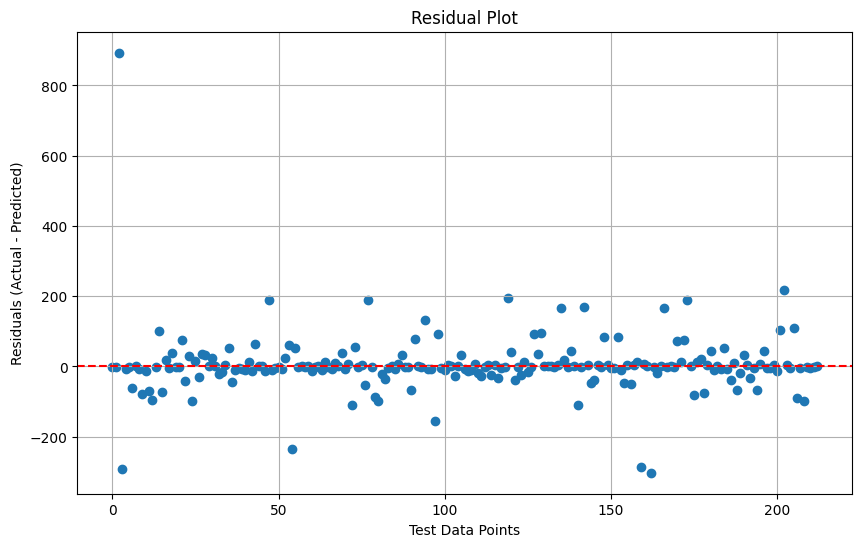

In [13]:
# Residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(range(len(residuals)), residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residual Plot")
plt.xlabel("Test Data Points")
plt.ylabel("Residuals (Actual - Predicted)")
plt.grid()
plt.show()


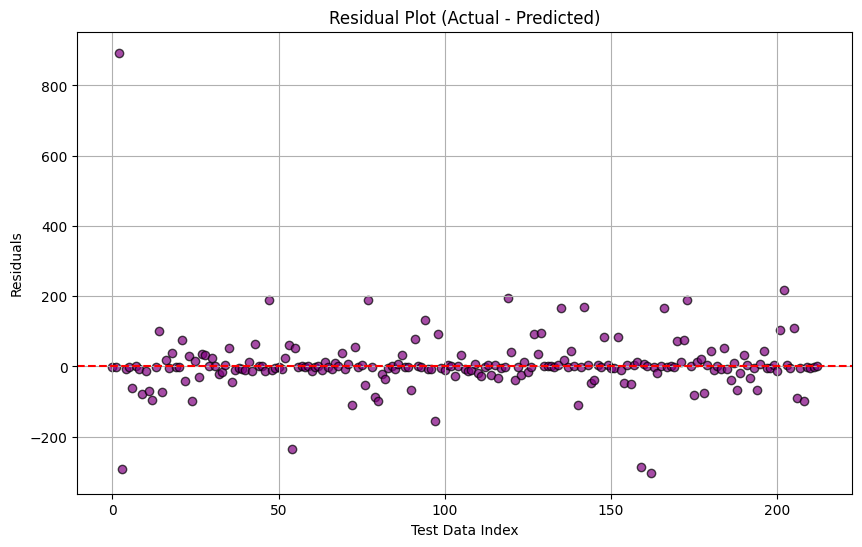

In [26]:
# Residuals
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(range(len(residuals)), residuals, alpha=0.7, color='purple', edgecolors='black')
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residual Plot (Actual - Predicted)")
plt.xlabel("Test Data Index")
plt.ylabel("Residuals")
plt.grid()
plt.show()


<ipython-input-14-f20593279a54>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")


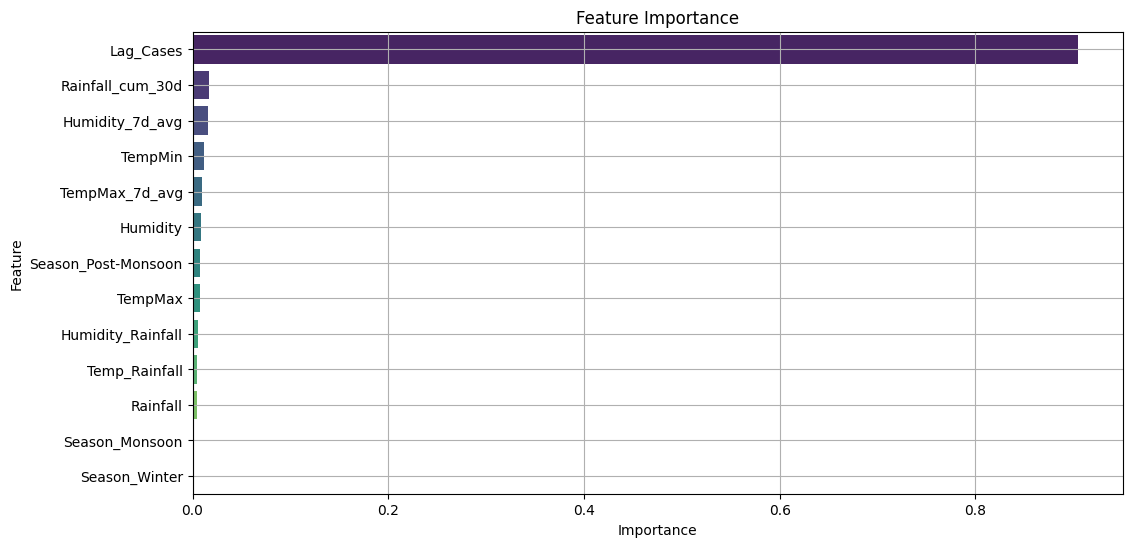

In [14]:
import pandas as pd
import seaborn as sns

# Feature importance
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.grid()
plt.show()


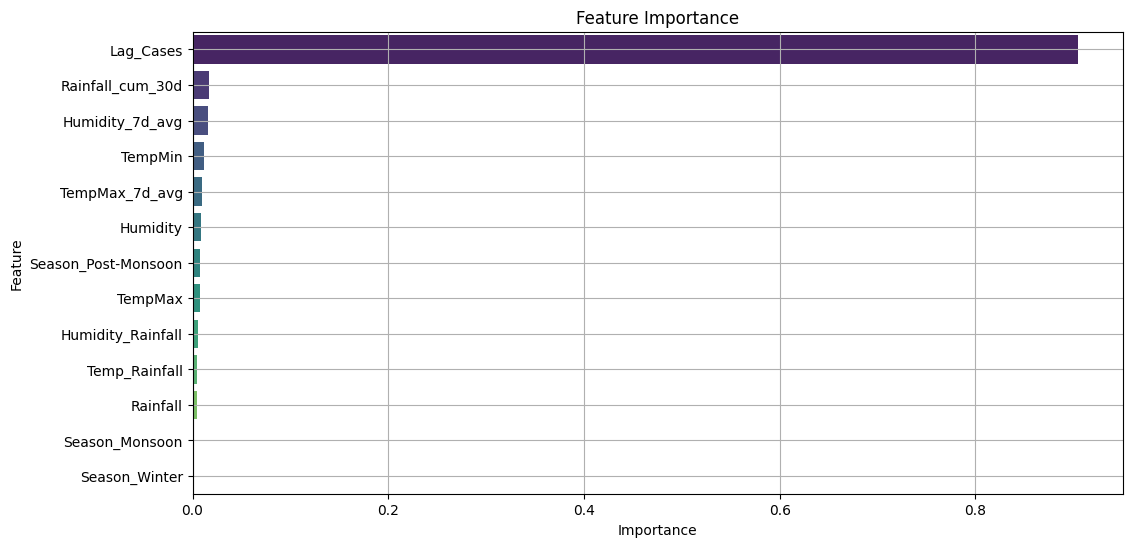

In [15]:
import pandas as pd
import seaborn as sns

# Feature importance
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
# Assigning 'Feature' to 'hue' and setting legend=False
sns.barplot(x="Importance", y="Feature", data=importance_df, hue="Feature", palette="viridis", legend=False)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.grid()
plt.show()

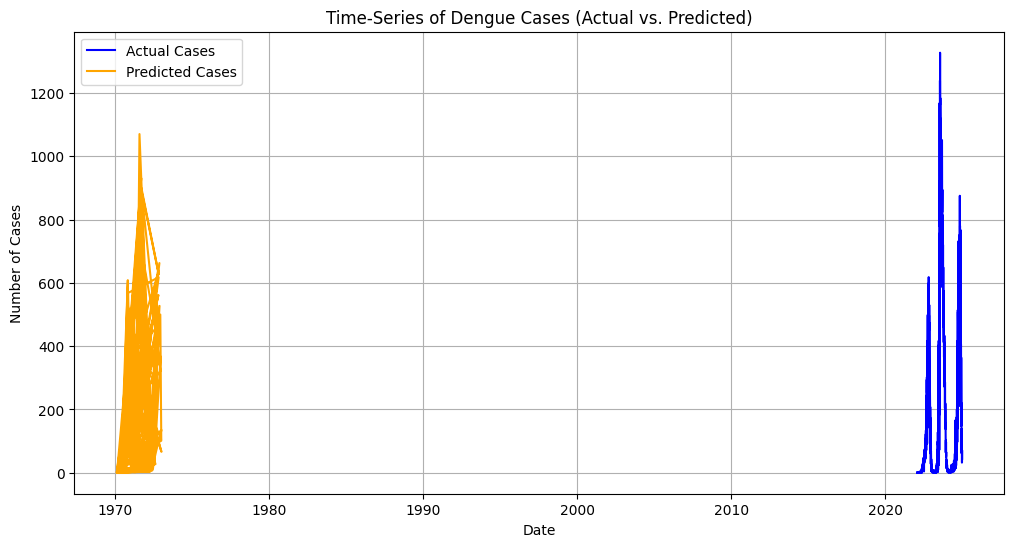

In [16]:
# Add predictions to the original test dataset
df_test = X_test.copy()
df_test['Actual Cases'] = y_test.values
df_test['Predicted Cases'] = y_pred

# Plot time-series of cases
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Cases'], label="Actual Cases", color='blue')
plt.plot(df_test.index, df_test['Predicted Cases'], label="Predicted Cases", color='orange')
plt.title("Time-Series of Dengue Cases (Actual vs. Predicted)")
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.legend()
plt.grid()
plt.show()


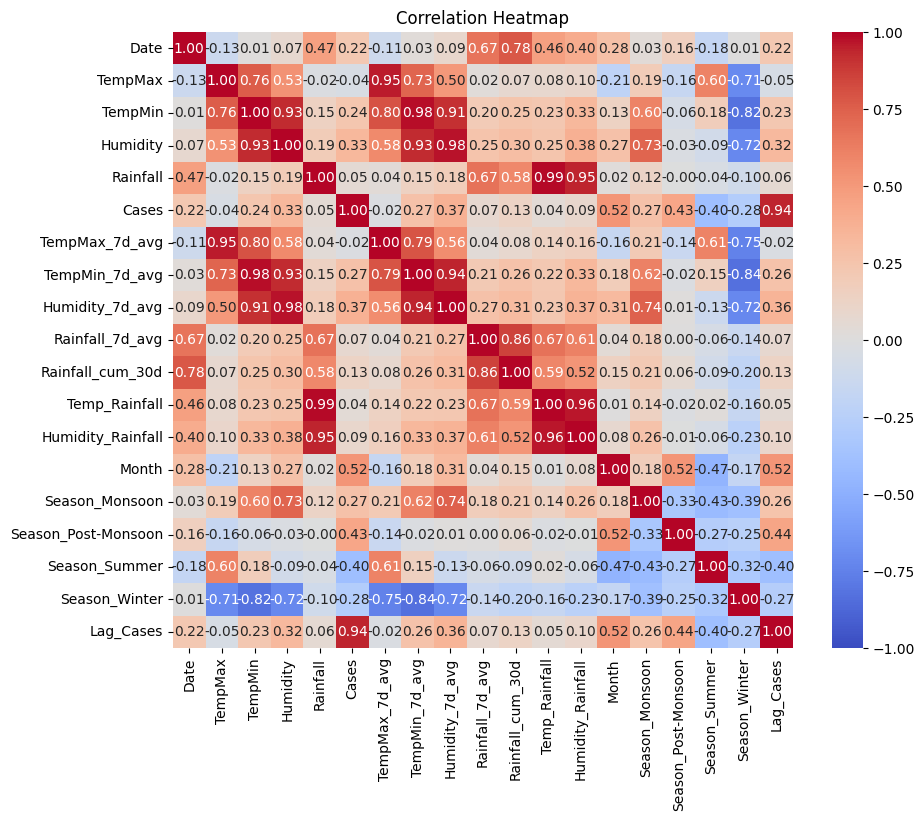

In [17]:
import numpy as np

# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt='.2f', vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()


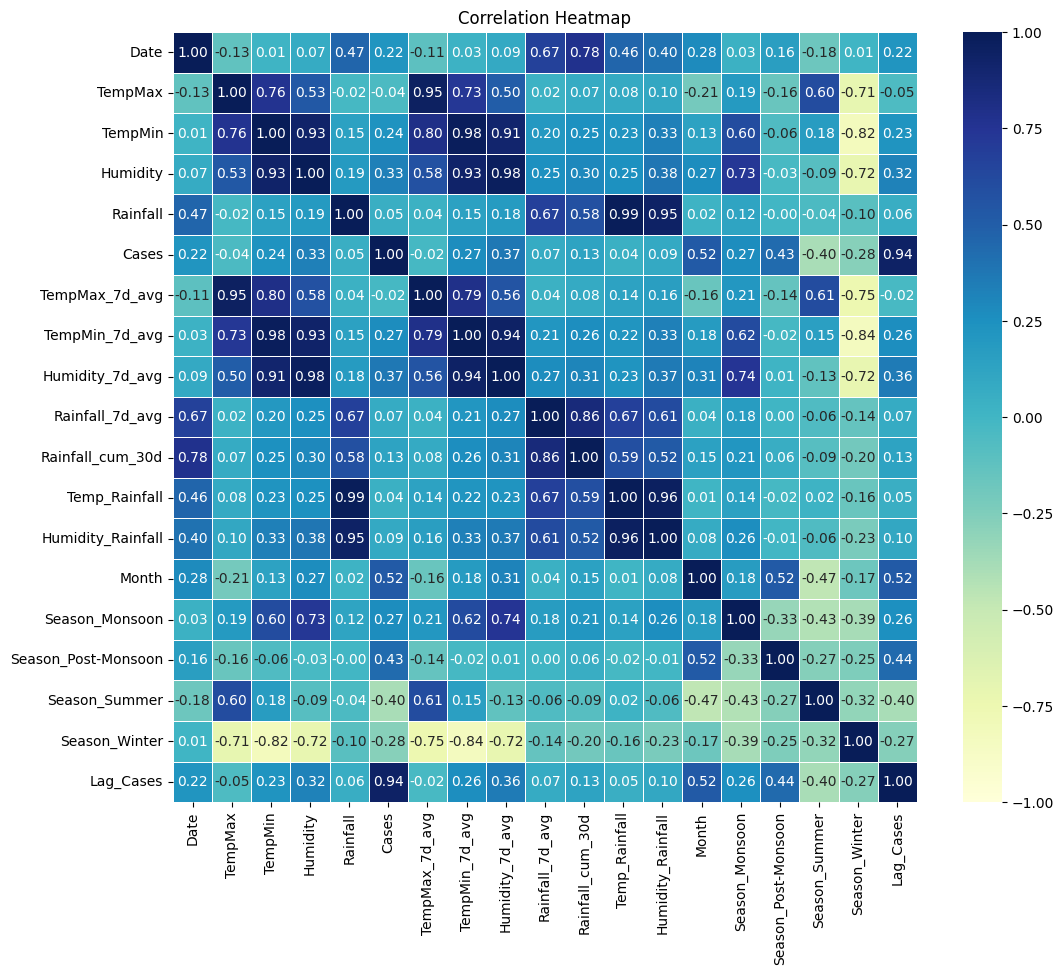

In [29]:
import numpy as np

# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu", fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()


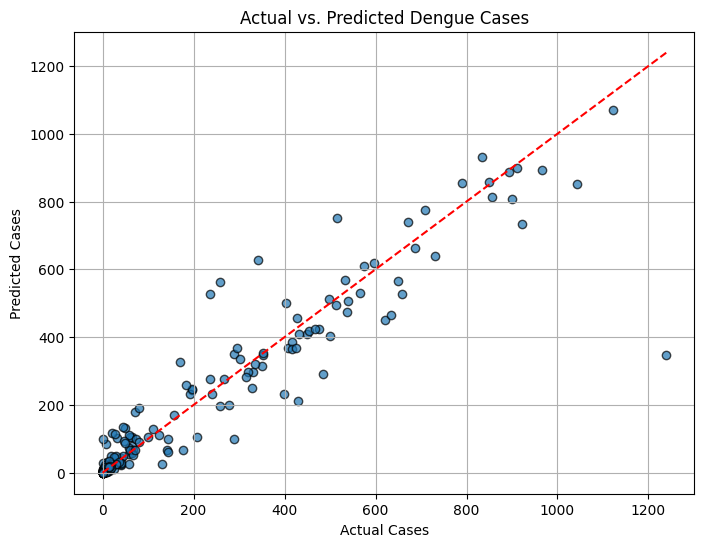

In [18]:
# Scatter plot: Actual vs. Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title("Actual vs. Predicted Dengue Cases")
plt.xlabel("Actual Cases")
plt.ylabel("Predicted Cases")
plt.grid()
plt.show()


<ipython-input-19-555192b14050>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Month", y="Cases", data=df, palette="coolwarm")


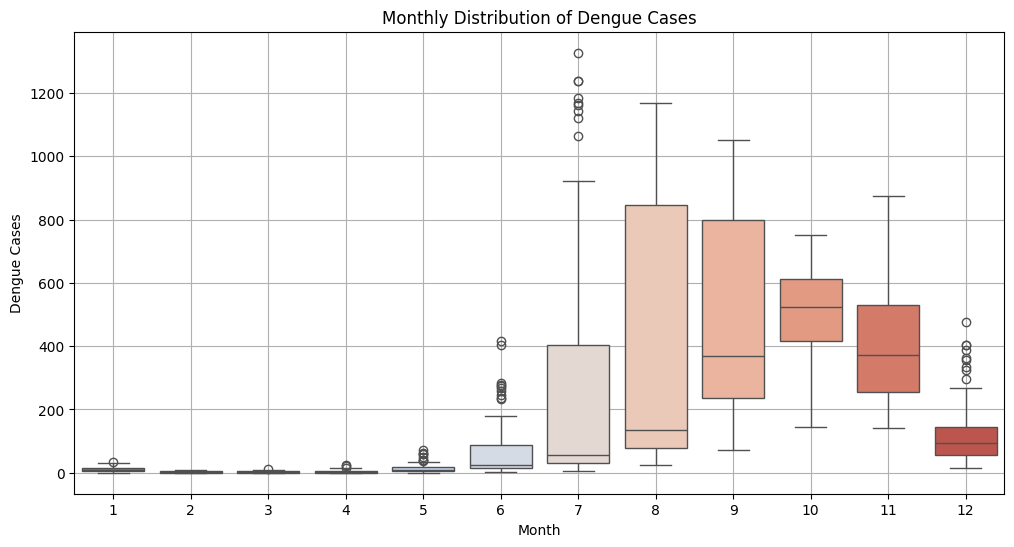

In [19]:
# Create a new column for 'Month'
df['Month'] = df['Date'].dt.month

# Seasonal boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x="Month", y="Cases", data=df, palette="coolwarm")
plt.title("Monthly Distribution of Dengue Cases")
plt.xlabel("Month")
plt.ylabel("Dengue Cases")
plt.grid()
plt.show()


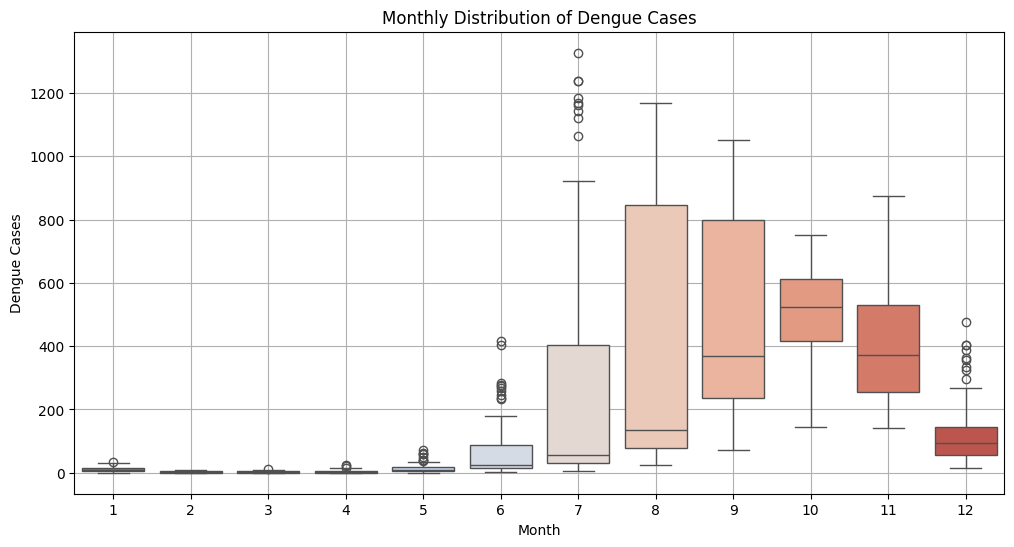

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a new column for 'Month'
df['Month'] = df['Date'].dt.month

# Create a custom color palette with "coolwarm" colors
custom_palette = sns.color_palette("coolwarm", n_colors=len(df['Month'].unique()))

# Seasonal boxplot with custom palette and hue set to "Month"
plt.figure(figsize=(12, 6))
sns.boxplot(x="Month", y="Cases", data=df, hue="Month", palette=custom_palette, legend=False)
plt.title("Monthly Distribution of Dengue Cases")
plt.xlabel("Month")
plt.ylabel("Dengue Cases")
plt.grid()
plt.show()

In [23]:

import plotly.express as px

# Plotly time-series chart
fig = px.line(df, x='Date', y='Cases', title="Time-Series of Dengue Cases")
fig.show()



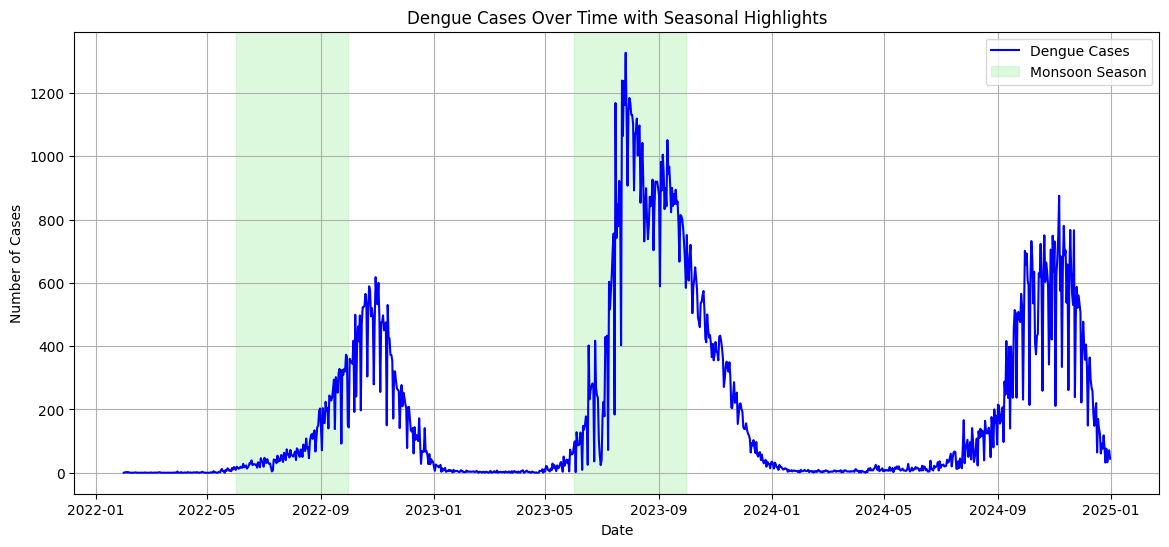

In [25]:
import seaborn as sns

# Time-Series with Seasonal Highlight
plt.figure(figsize=(14, 6))
sns.lineplot(x=df['Date'], y=df['Cases'], label="Dengue Cases", color='blue')
plt.axvspan('2022-06-01', '2022-09-30', color='lightgreen', alpha=0.3, label="Monsoon Season")
plt.axvspan('2023-06-01', '2023-09-30', color='lightgreen', alpha=0.3)
plt.title("Dengue Cases Over Time with Seasonal Highlights")
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.legend()
plt.grid()
plt.show()


<ipython-input-27-e08537849d2f>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




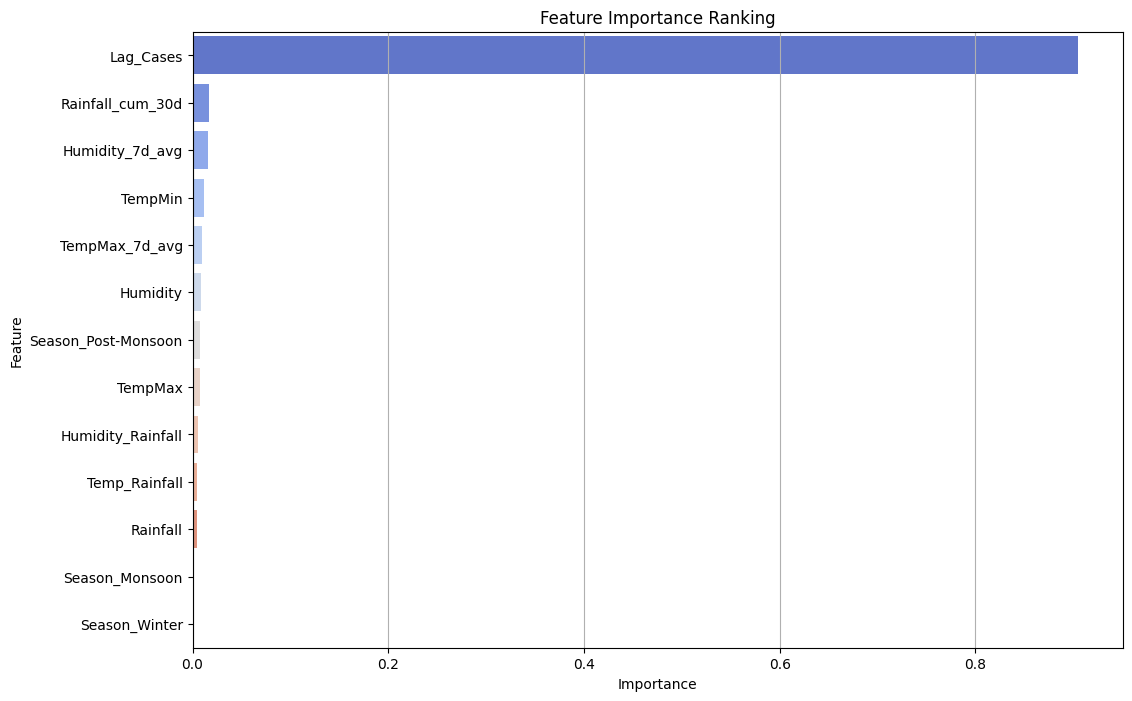

In [27]:
import pandas as pd
import seaborn as sns

# Feature Importance
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x="Importance", y="Feature", data=importance_df, palette="coolwarm")
plt.title("Feature Importance Ranking")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.grid(axis='x')  # Add gridlines only to the x-axis
plt.show()


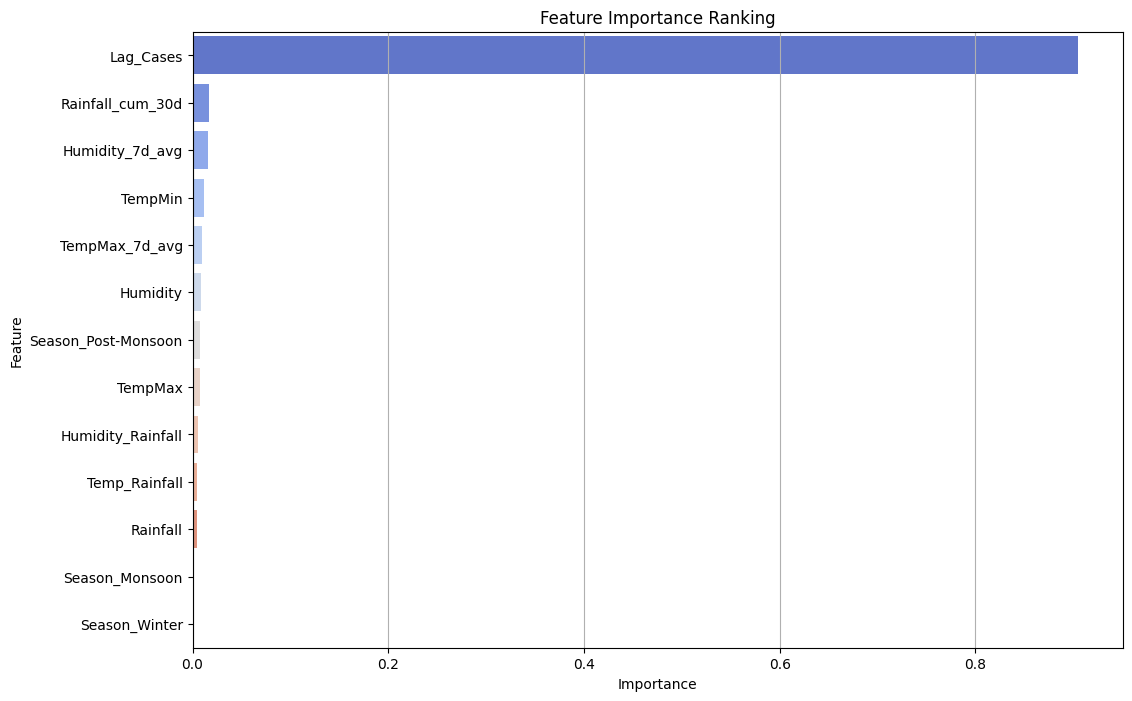

In [28]:
import pandas as pd
import seaborn as sns

# Feature Importance
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 8))
# Assigning 'Feature' to 'hue' and setting legend=False
sns.barplot(x="Importance", y="Feature", data=importance_df, hue="Feature", palette="coolwarm", legend=False)
plt.title("Feature Importance Ranking")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.grid(axis='x')  # Add gridlines only to the x-axis
plt.show()

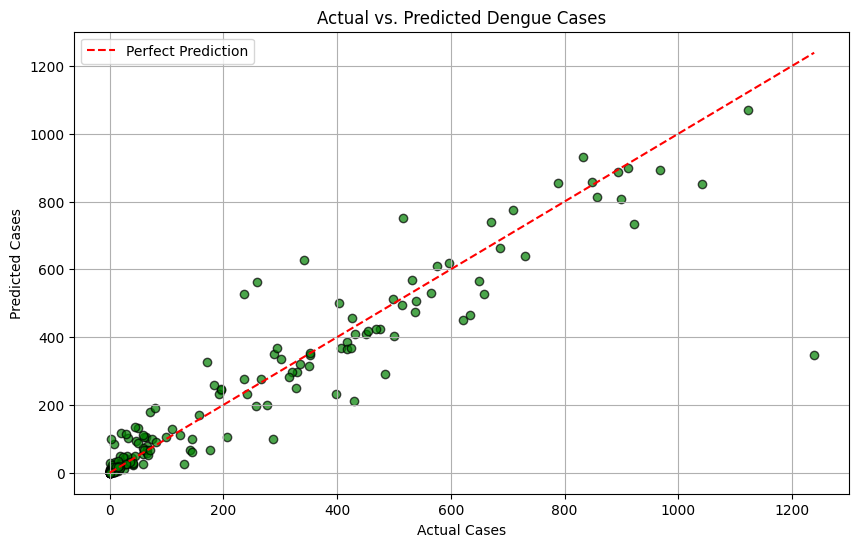

In [30]:
# Scatter plot: Actual vs. Predicted Dengue Cases
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='black', color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label="Perfect Prediction")
plt.title("Actual vs. Predicted Dengue Cases")
plt.xlabel("Actual Cases")
plt.ylabel("Predicted Cases")
plt.legend()
plt.grid()
plt.show()


<ipython-input-31-32c8d7621713>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




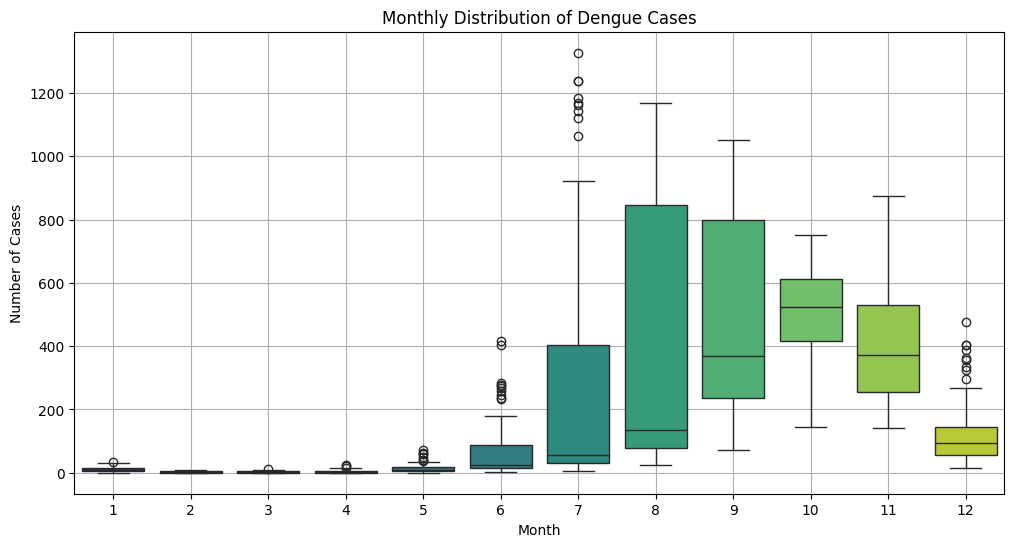

In [31]:
# Create a 'Month' column if not already present
df['Month'] = pd.to_datetime(df['Date']).dt.month

# Monthly Distribution Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x="Month", y="Cases", data=df, palette="viridis")
plt.title("Monthly Distribution of Dengue Cases")
plt.xlabel("Month")
plt.ylabel("Number of Cases")
plt.grid()
plt.show()


In [32]:
import plotly.express as px

# Interactive Time-Series Plot
fig = px.line(df, x='Date', y='Cases', title="Interactive Time-Series of Dengue Cases", labels={'Cases': 'Number of Cases'})
fig.update_traces(line_color='blue', line_width=2)
fig.show()


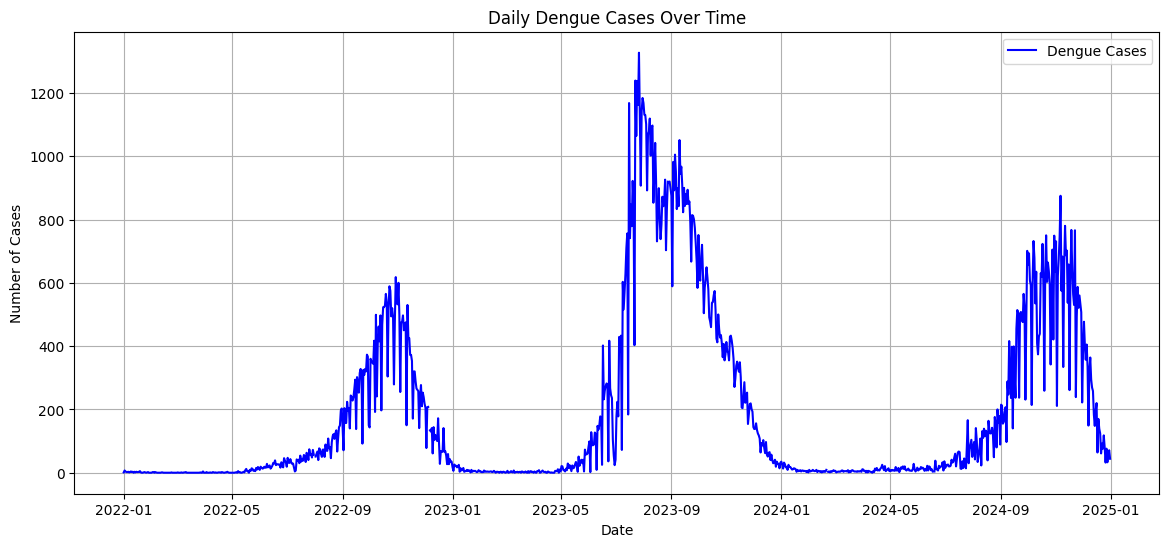

In [34]:
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Dhaka22-24.csv")
df['Date'] = pd.to_datetime(df['Date'])

# Plot dengue cases over time
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Cases'], label="Dengue Cases", color='blue')
plt.title("Daily Dengue Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.legend()
plt.grid()
plt.show()


<ipython-input-35-cbe1e260eb26>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




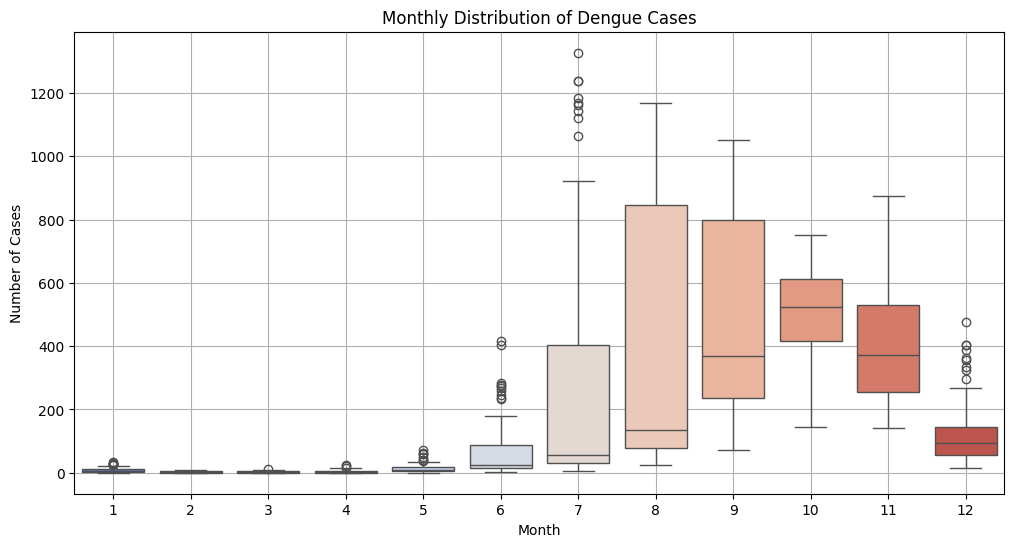

In [35]:
import seaborn as sns

# Extract 'Month' and 'Year' for seasonality analysis
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Seasonal Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='Cases', data=df, palette='coolwarm')
plt.title("Monthly Distribution of Dengue Cases")
plt.xlabel("Month")
plt.ylabel("Number of Cases")
plt.grid()
plt.show()


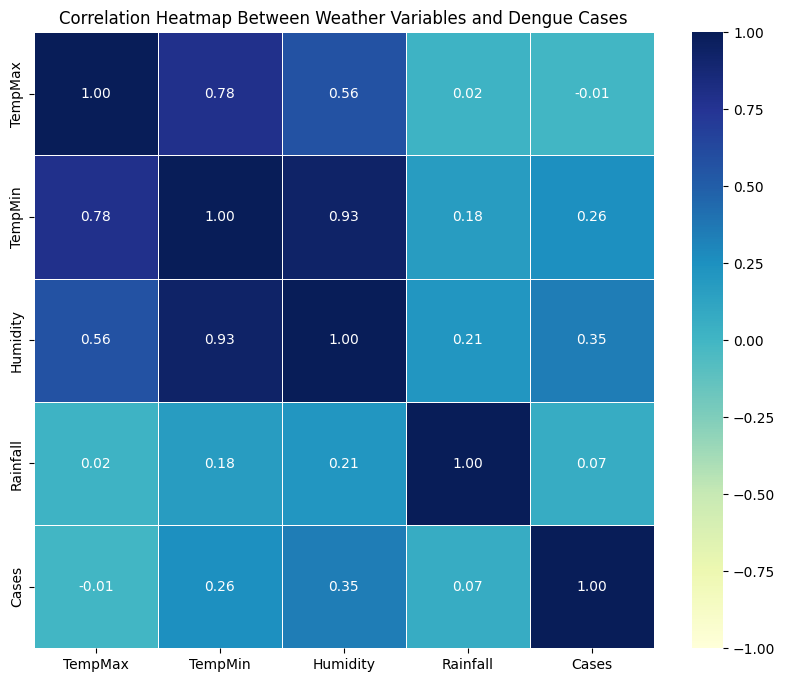

In [36]:
import numpy as np

# Correlation matrix
corr_matrix = df[['TempMax', 'TempMin', 'Humidity', 'Rainfall', 'Cases']].corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title("Correlation Heatmap Between Weather Variables and Dengue Cases")
plt.show()


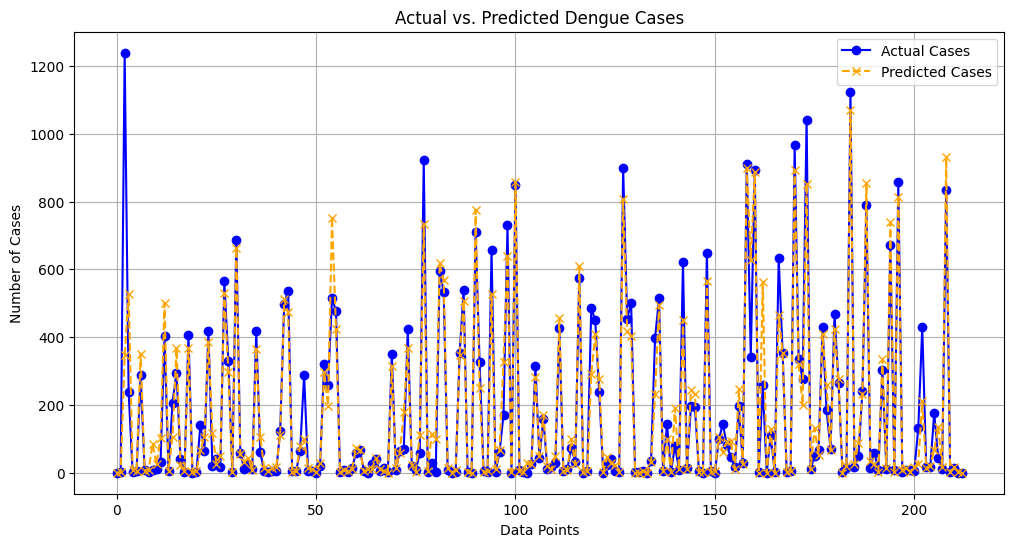

In [37]:
# Example: Assuming 'y_test' and 'y_pred' are from your trained model
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test)), y_test, label="Actual Cases", linestyle='-', marker='o', color='blue')
plt.plot(range(len(y_pred)), y_pred, label="Predicted Cases", linestyle='--', marker='x', color='orange')
plt.title("Actual vs. Predicted Dengue Cases")
plt.xlabel("Data Points")
plt.ylabel("Number of Cases")
plt.legend()
plt.grid()
plt.show()


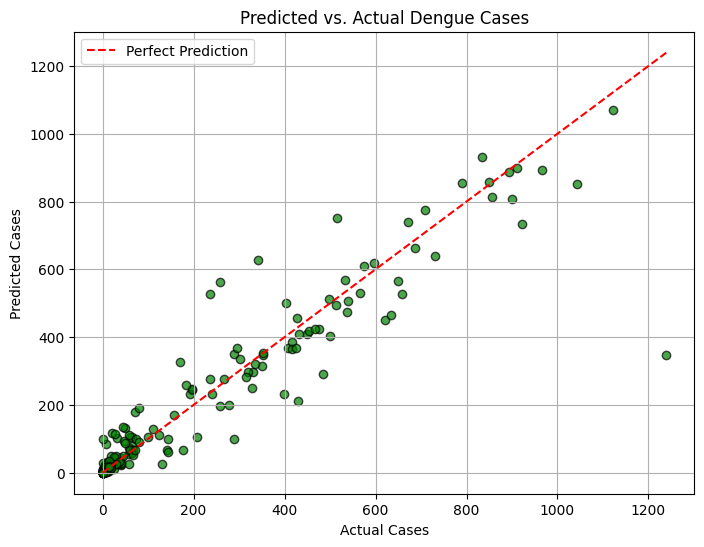

In [38]:
# Scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='green', edgecolors='black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label="Perfect Prediction")
plt.title("Predicted vs. Actual Dengue Cases")
plt.xlabel("Actual Cases")
plt.ylabel("Predicted Cases")
plt.legend()
plt.grid()
plt.show()


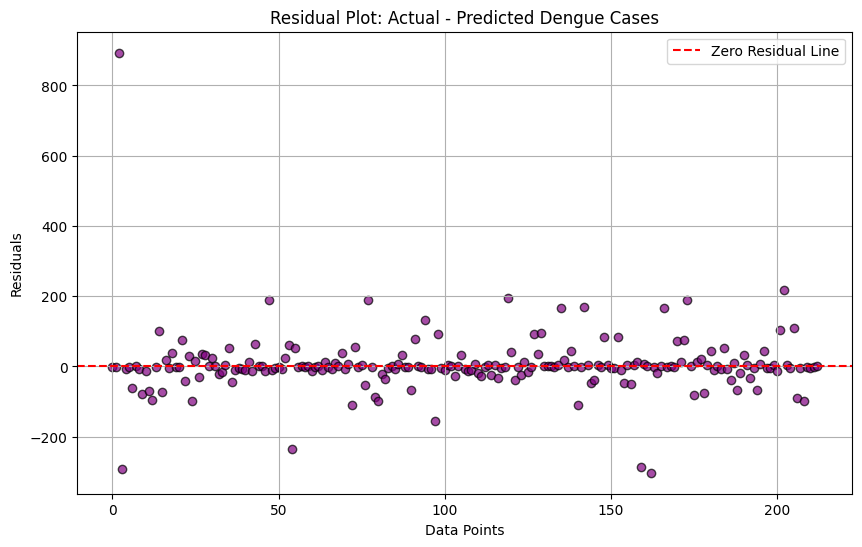

In [39]:
# Calculate residuals
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(range(len(residuals)), residuals, color='purple', alpha=0.7, edgecolors='black')
plt.axhline(y=0, color='red', linestyle='--', label="Zero Residual Line")
plt.title("Residual Plot: Actual - Predicted Dengue Cases")
plt.xlabel("Data Points")
plt.ylabel("Residuals")
plt.legend()
plt.grid()
plt.show()


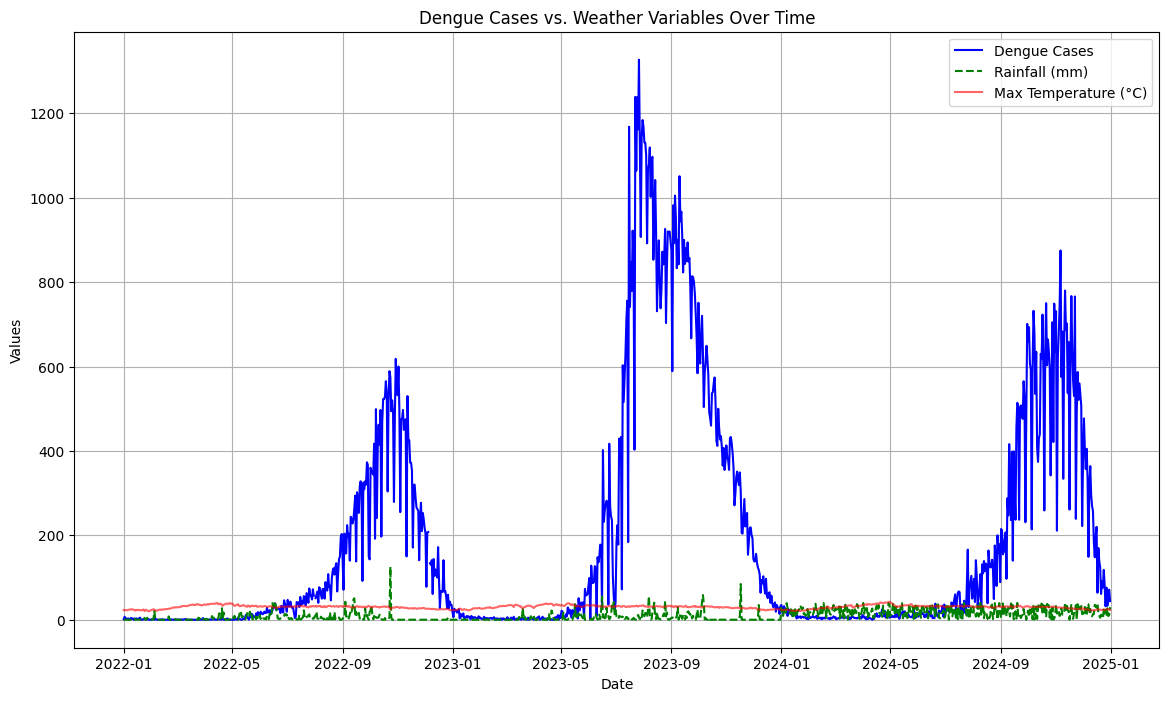

In [40]:
plt.figure(figsize=(14, 8))

# Plot dengue cases
plt.plot(df['Date'], df['Cases'], label='Dengue Cases', color='blue')

# Overlay rainfall
plt.plot(df['Date'], df['Rainfall'], label='Rainfall (mm)', color='green', linestyle='--')

# Overlay maximum temperature
plt.plot(df['Date'], df['TempMax'], label='Max Temperature (°C)', color='red', alpha=0.6)

plt.title("Dengue Cases vs. Weather Variables Over Time")
plt.xlabel("Date")
plt.ylabel("Values")
plt.legend()
plt.grid()
plt.show()


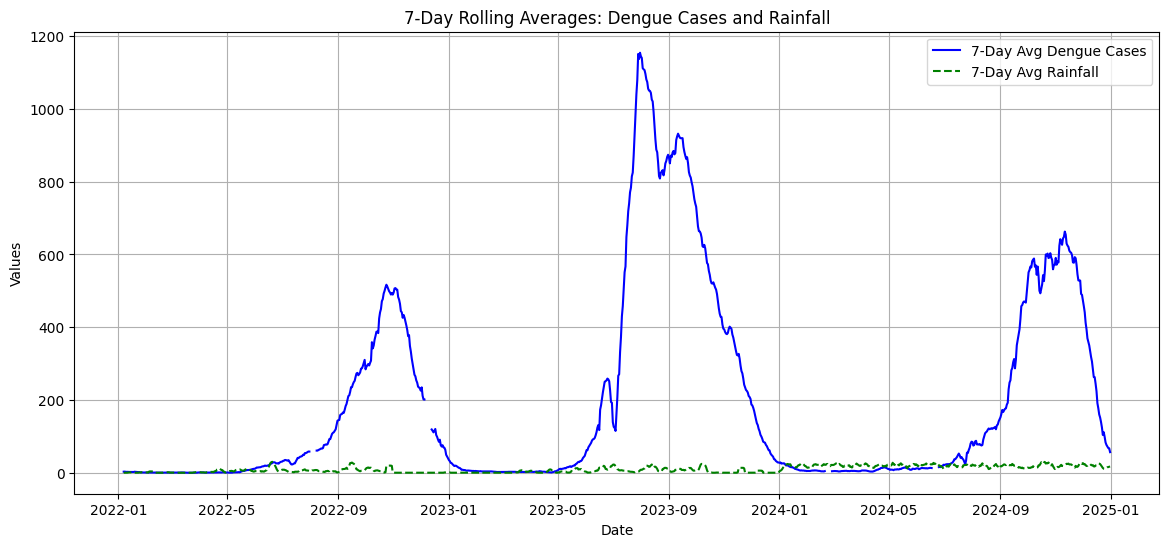

In [41]:
# Calculate rolling averages
df['Cases_7d_avg'] = df['Cases'].rolling(window=7).mean()
df['Rainfall_7d_avg'] = df['Rainfall'].rolling(window=7).mean()

# Plot rolling averages
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Cases_7d_avg'], label='7-Day Avg Dengue Cases', color='blue')
plt.plot(df['Date'], df['Rainfall_7d_avg'], label='7-Day Avg Rainfall', color='green', linestyle='--')

plt.title("7-Day Rolling Averages: Dengue Cases and Rainfall")
plt.xlabel("Date")
plt.ylabel("Values")
plt.legend()
plt.grid()
plt.show()


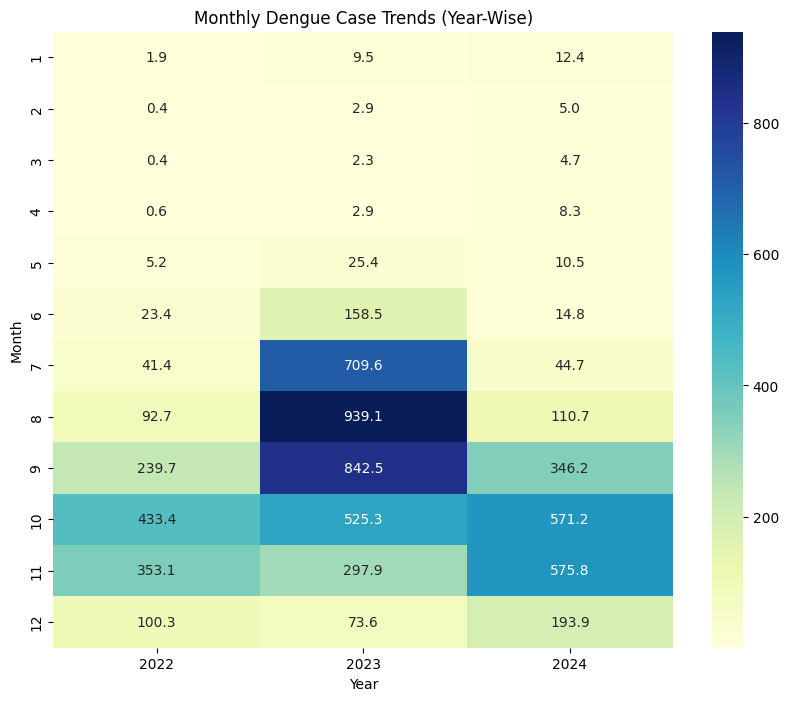

In [42]:
# Extract month and year
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Pivot table for heatmap
heatmap_data = df.pivot_table(values='Cases', index='Month', columns='Year', aggfunc='mean')

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".1f")
plt.title("Monthly Dengue Case Trends (Year-Wise)")
plt.xlabel("Year")
plt.ylabel("Month")
plt.show()


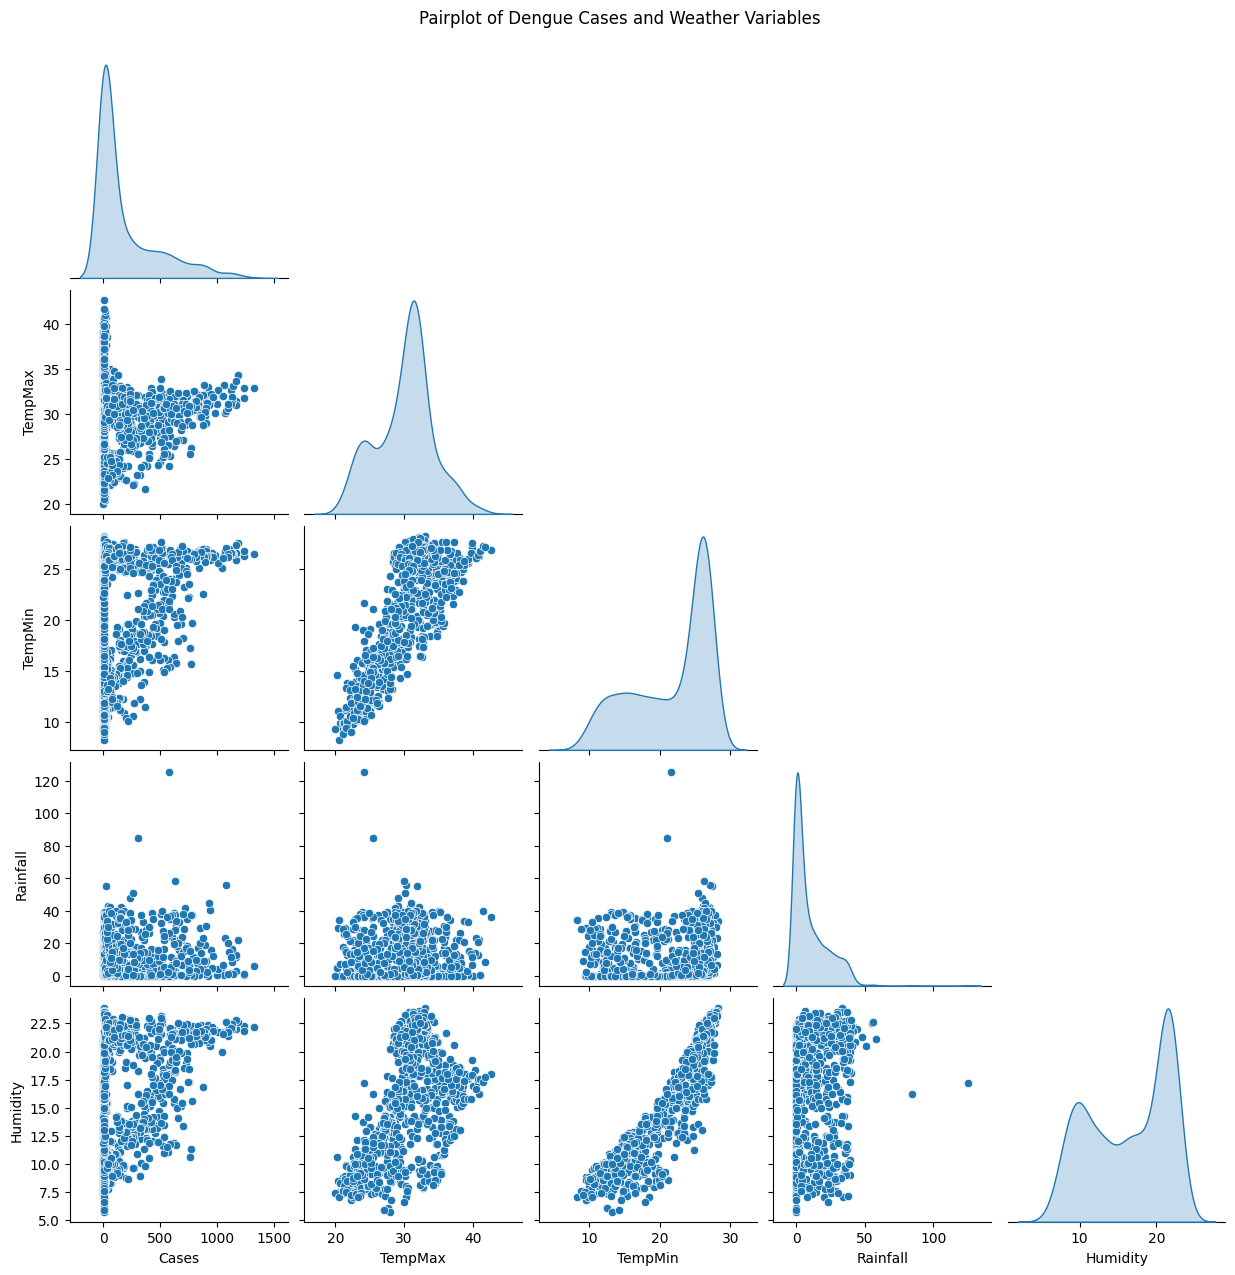

In [43]:
# Use pairplot to visualize interactions between variables
sns.pairplot(df[['Cases', 'TempMax', 'TempMin', 'Rainfall', 'Humidity']], diag_kind='kde', corner=True)
plt.suptitle("Pairplot of Dengue Cases and Weather Variables", y=1.02)
plt.show()


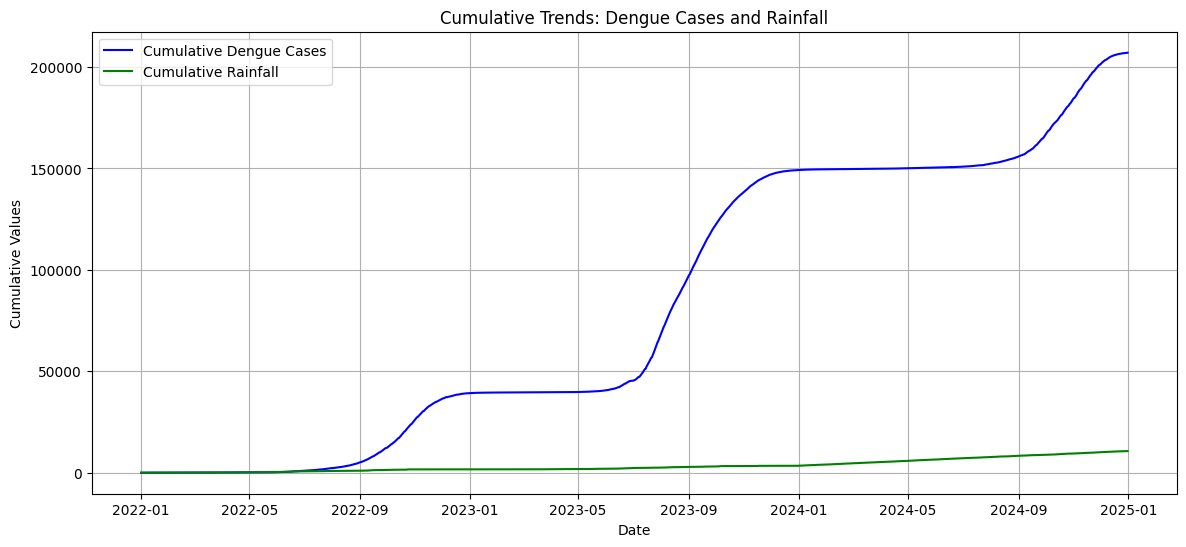

In [44]:
# Calculate cumulative sums
df['Cumulative_Cases'] = df['Cases'].cumsum()
df['Cumulative_Rainfall'] = df['Rainfall'].cumsum()

# Plot cumulative trends
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Cumulative_Cases'], label='Cumulative Dengue Cases', color='blue')
plt.plot(df['Date'], df['Cumulative_Rainfall'], label='Cumulative Rainfall', color='green')

plt.title("Cumulative Trends: Dengue Cases and Rainfall")
plt.xlabel("Date")
plt.ylabel("Cumulative Values")
plt.legend()
plt.grid()
plt.show()


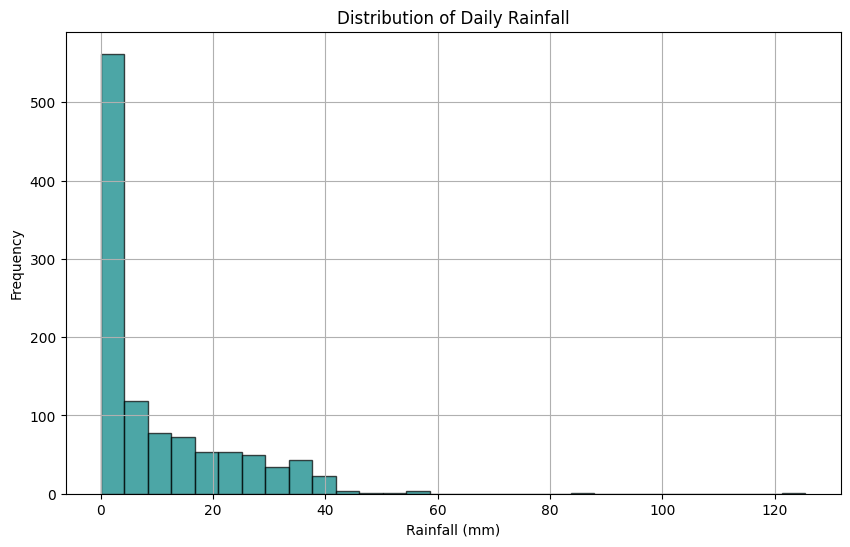

In [45]:
plt.figure(figsize=(10, 6))
plt.hist(df['Rainfall'], bins=30, color='teal', edgecolor='black', alpha=0.7)
plt.title("Distribution of Daily Rainfall")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Frequency")
plt.grid()
plt.show()


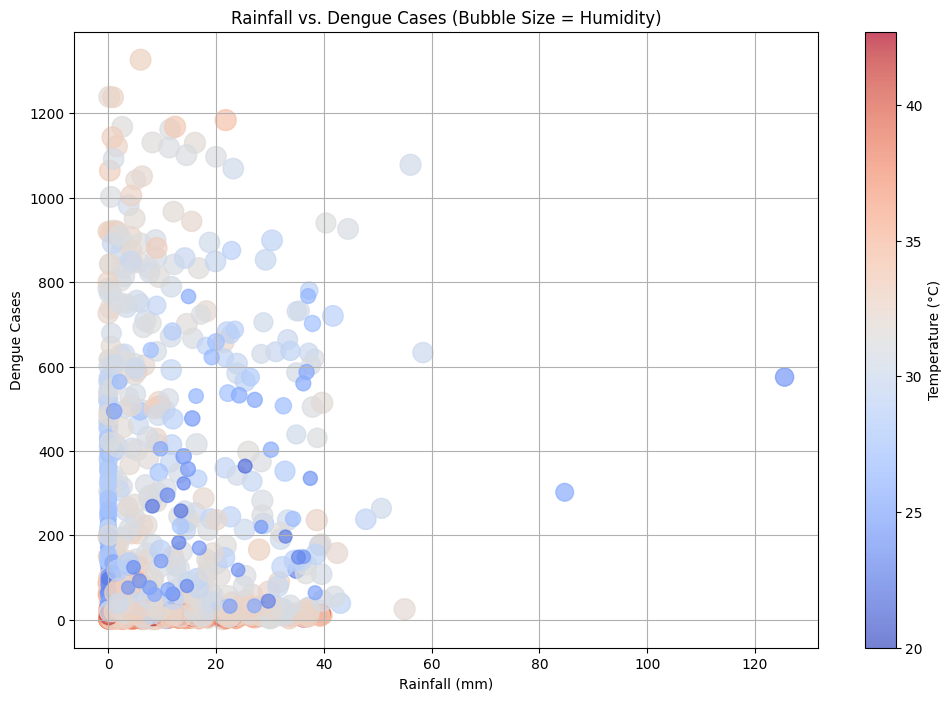

In [46]:
plt.figure(figsize=(12, 8))
plt.scatter(df['Rainfall'], df['Cases'], s=df['Humidity'] * 10, c=df['TempMax'], cmap='coolwarm', alpha=0.7)
plt.colorbar(label='Temperature (°C)')
plt.title("Rainfall vs. Dengue Cases (Bubble Size = Humidity)")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Dengue Cases")
plt.grid()
plt.show()


In [47]:
import plotly.express as px

# Interactive time-series chart
fig = px.line(df, x='Date', y='Cases', title="Interactive Dengue Cases Over Time", labels={'Cases': 'Dengue Cases'})
fig.update_traces(line_color='blue', line_width=2)
fig.show()


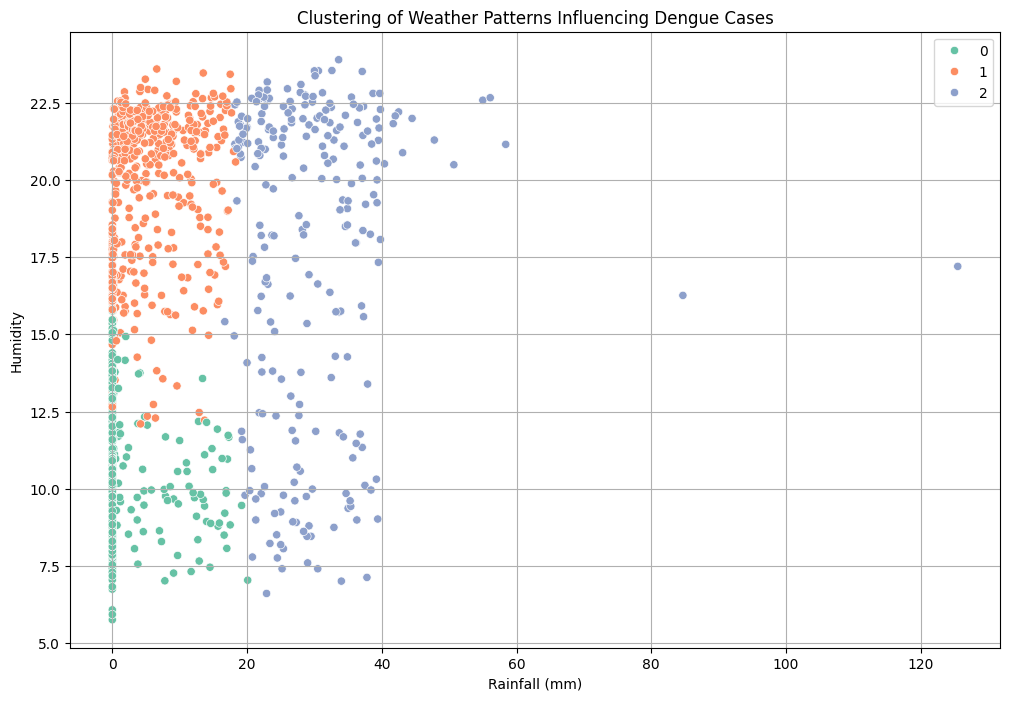

In [48]:
from sklearn.cluster import KMeans
import numpy as np

# Select weather variables for clustering
weather_data = df[['TempMax', 'TempMin', 'Rainfall', 'Humidity']].dropna()

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42).fit(weather_data)
df['Cluster'] = kmeans.labels_

# Plot clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Rainfall', y='Humidity', hue='Cluster', data=df, palette='Set2')
plt.title("Clustering of Weather Patterns Influencing Dengue Cases")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Humidity")
plt.legend()
plt.grid()
plt.show()


# Correlation Heatmap

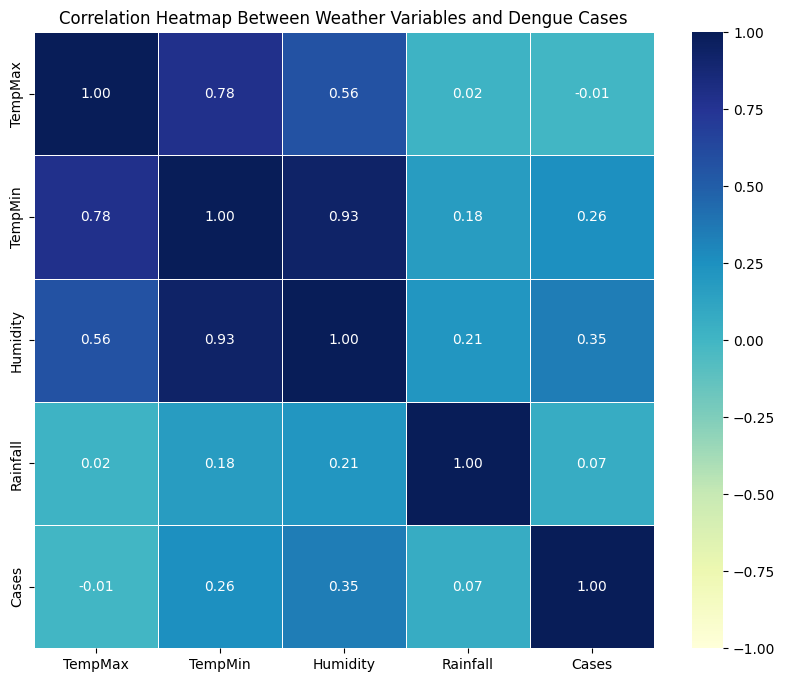

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Dhaka22-24.csv")
df['Date'] = pd.to_datetime(df['Date'])  # Ensure 'Date' is in datetime format

# Select numerical variables to calculate correlations
correlation_data = df[['TempMax', 'TempMin', 'Humidity', 'Rainfall', 'Cases']]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title("Correlation Heatmap Between Weather Variables and Dengue Cases")
plt.show()


<ipython-input-51-9e98efe0db20>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




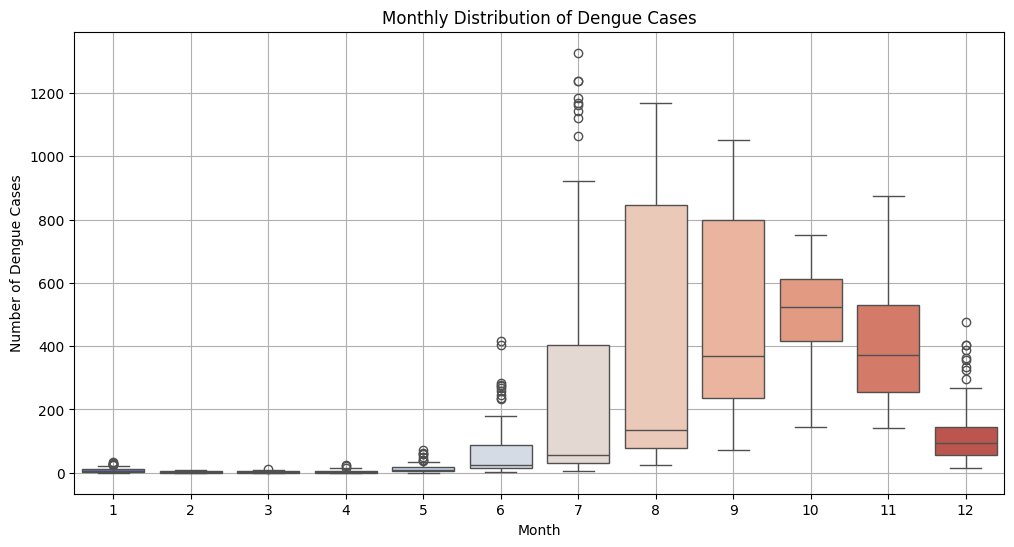

In [51]:
# Extract 'Month' for seasonality analysis
df['Month'] = df['Date'].dt.month

# Plot monthly trends using a boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='Cases', data=df, palette='coolwarm')
plt.title("Monthly Distribution of Dengue Cases")
plt.xlabel("Month")
plt.ylabel("Number of Dengue Cases")
plt.grid()
plt.show()


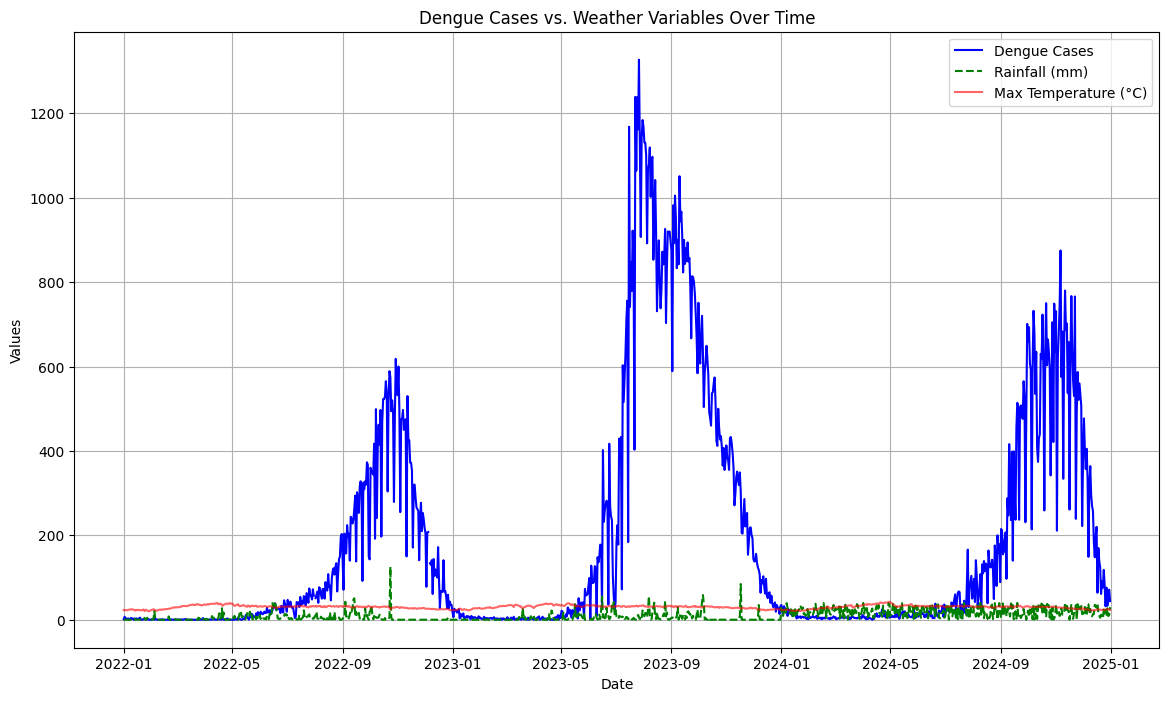

In [52]:
# Plot dengue cases and weather variables over time
plt.figure(figsize=(14, 8))
plt.plot(df['Date'], df['Cases'], label='Dengue Cases', color='blue')
plt.plot(df['Date'], df['Rainfall'], label='Rainfall (mm)', color='green', linestyle='--')
plt.plot(df['Date'], df['TempMax'], label='Max Temperature (°C)', color='red', alpha=0.6)

plt.title("Dengue Cases vs. Weather Variables Over Time")
plt.xlabel("Date")
plt.ylabel("Values")
plt.legend()
plt.grid()
plt.show()


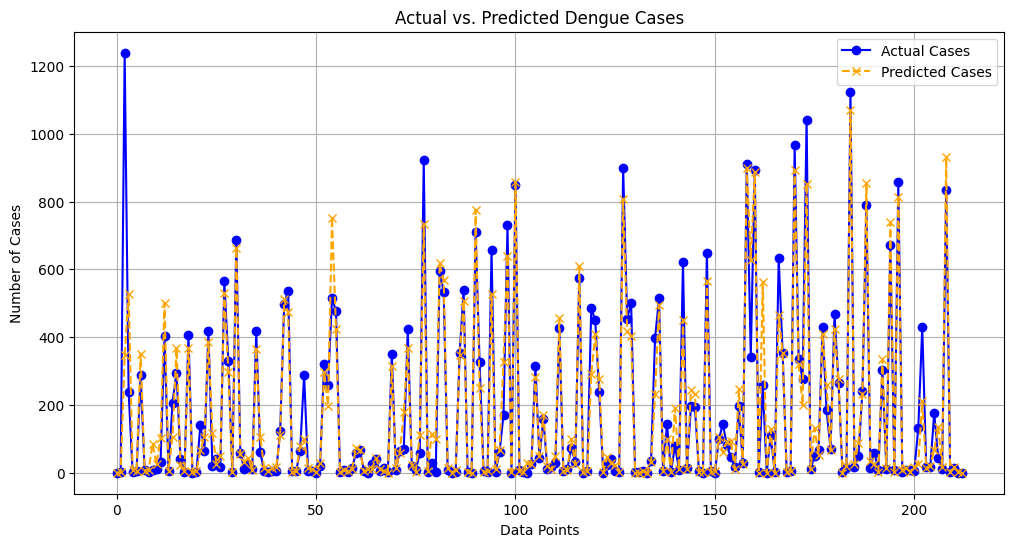

In [53]:
# Example: Replace 'y_test' and 'y_pred' with your actual data
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test)), y_test, label="Actual Cases", linestyle='-', marker='o', color='blue')
plt.plot(range(len(y_pred)), y_pred, label="Predicted Cases", linestyle='--', marker='x', color='orange')
plt.title("Actual vs. Predicted Dengue Cases")
plt.xlabel("Data Points")
plt.ylabel("Number of Cases")
plt.legend()
plt.grid()
plt.show()


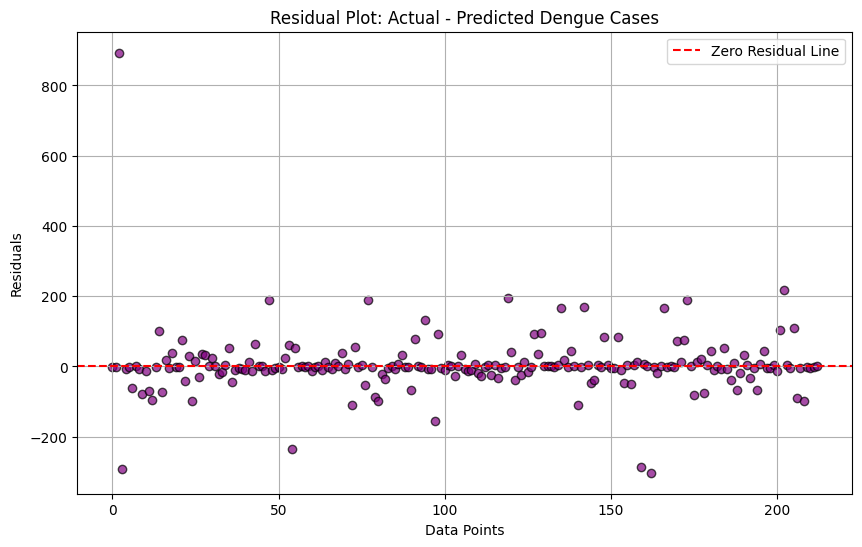

In [54]:
# Residuals (Difference between actual and predicted values)
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(range(len(residuals)), residuals, color='purple', alpha=0.7, edgecolors='black')
plt.axhline(y=0, color='red', linestyle='--', label="Zero Residual Line")
plt.title("Residual Plot: Actual - Predicted Dengue Cases")
plt.xlabel("Data Points")
plt.ylabel("Residuals")
plt.legend()
plt.grid()
plt.show()


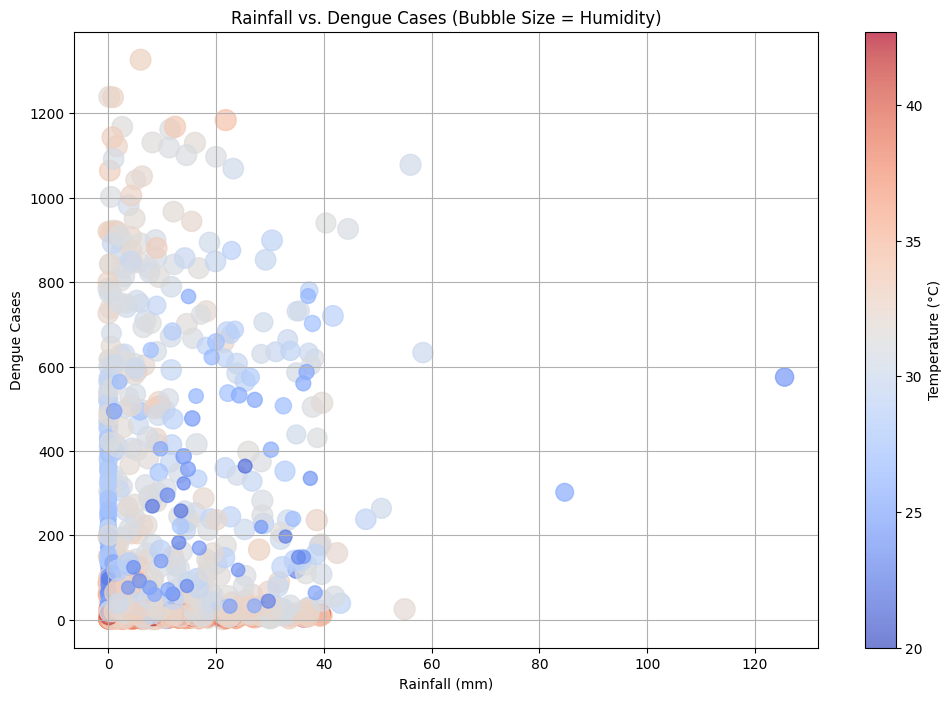

In [55]:
plt.figure(figsize=(12, 8))
plt.scatter(df['Rainfall'], df['Cases'], s=df['Humidity'] * 10, c=df['TempMax'], cmap='coolwarm', alpha=0.7)
plt.colorbar(label='Temperature (°C)')
plt.title("Rainfall vs. Dengue Cases (Bubble Size = Humidity)")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Dengue Cases")
plt.grid()
plt.show()


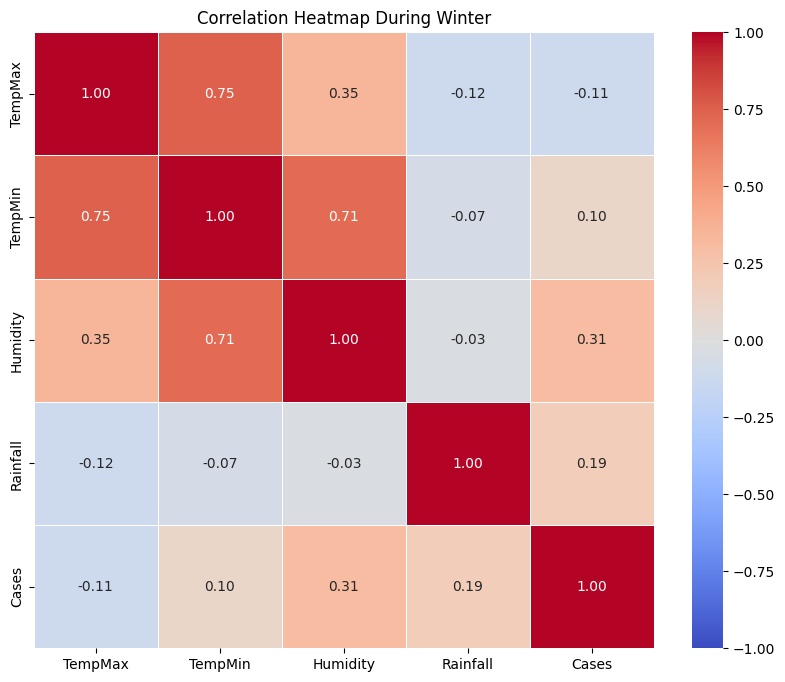

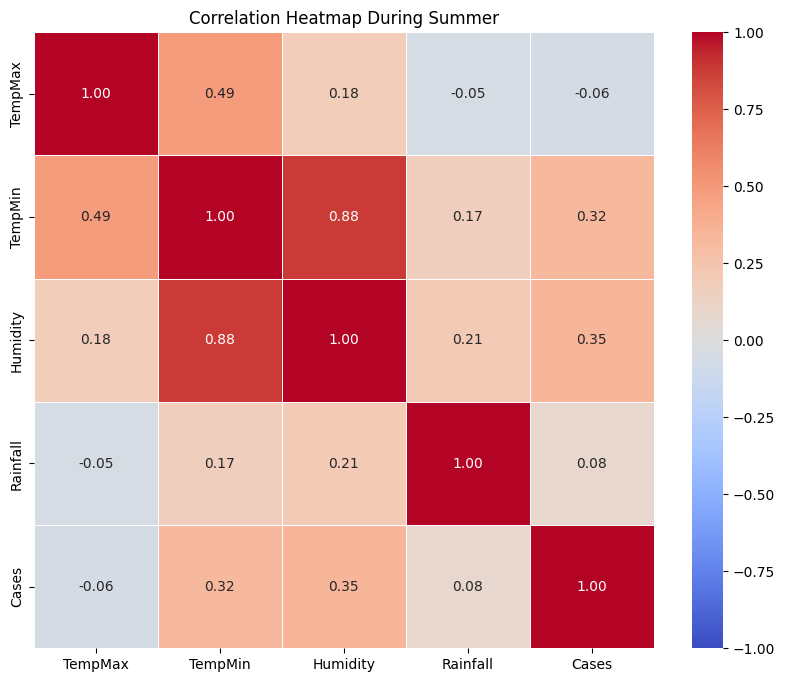

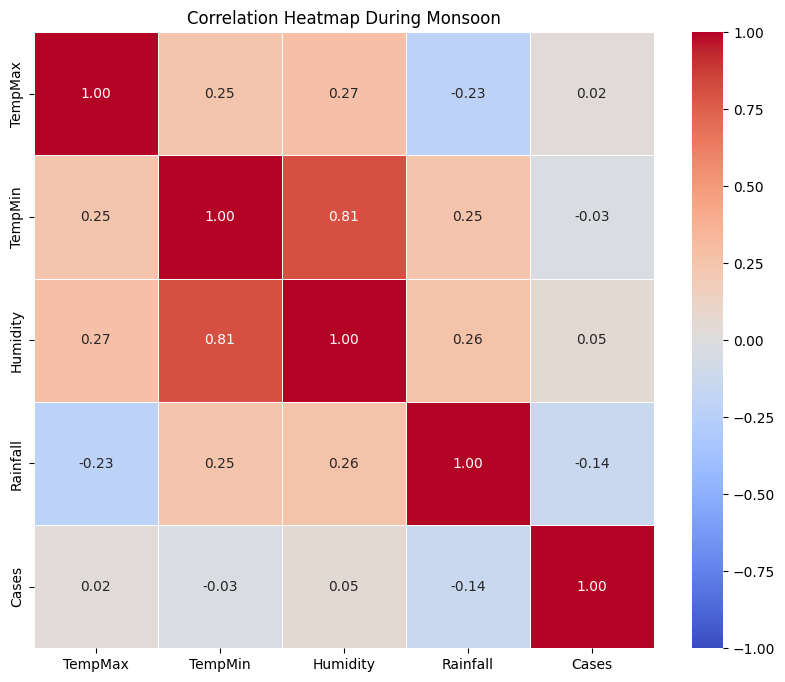

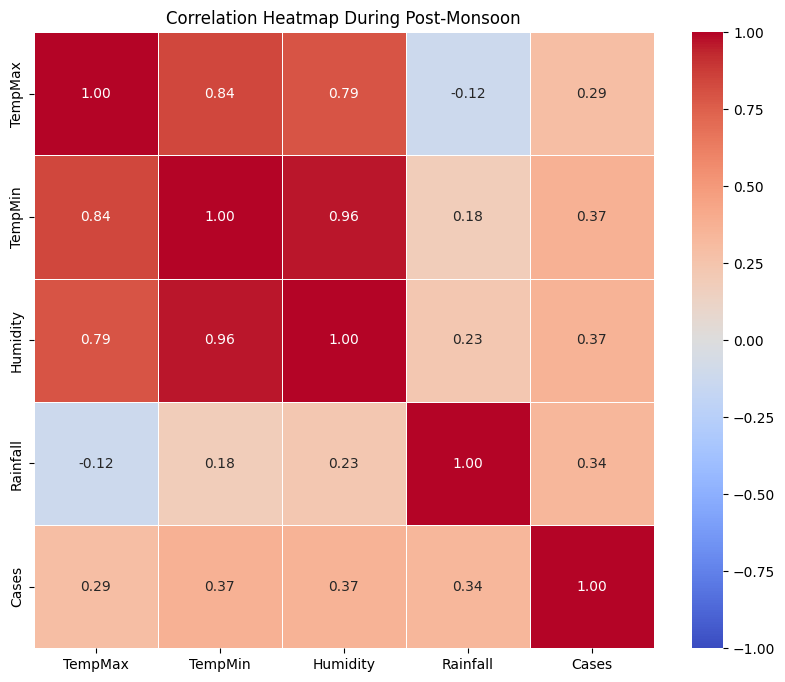

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Add 'Month' and 'Season' to the dataset
df['Month'] = df['Date'].dt.month

def get_season(month):
    if month in [6, 7, 8, 9]:  # Monsoon
        return 'Monsoon'
    elif month in [10, 11]:  # Post-Monsoon
        return 'Post-Monsoon'
    elif month in [12, 1, 2]:  # Winter
        return 'Winter'
    else:  # Summer
        return 'Summer'

df['Season'] = df['Month'].apply(get_season)

# Seasonal correlation heatmaps
seasons = df['Season'].unique()
for season in seasons:
    seasonal_data = df[df['Season'] == season][['TempMax', 'TempMin', 'Humidity', 'Rainfall', 'Cases']]
    correlation_matrix = seasonal_data.corr()

    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
    plt.title(f"Correlation Heatmap During {season}")
    plt.show()


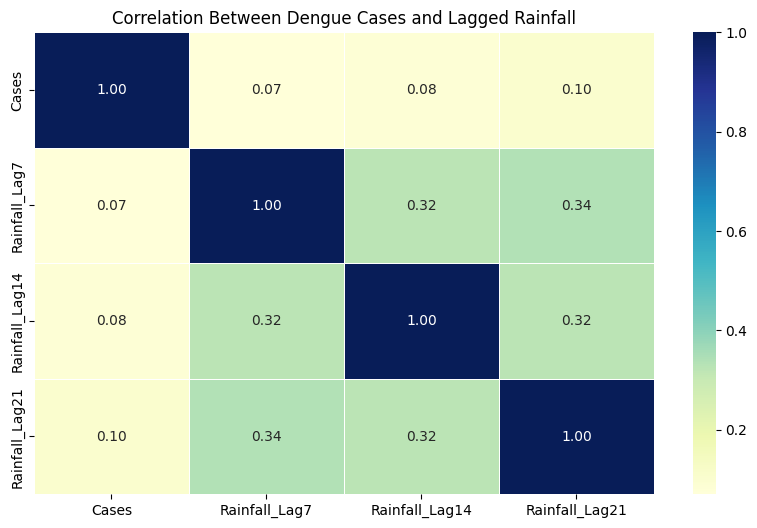

In [57]:
# Create lagged features for rainfall
df['Rainfall_Lag7'] = df['Rainfall'].shift(7)
df['Rainfall_Lag14'] = df['Rainfall'].shift(14)
df['Rainfall_Lag21'] = df['Rainfall'].shift(21)

# Correlation with lagged rainfall
correlation_data = df[['Cases', 'Rainfall_Lag7', 'Rainfall_Lag14', 'Rainfall_Lag21']].corr()

# Plot lagged correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_data, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5)
plt.title("Correlation Between Dengue Cases and Lagged Rainfall")
plt.show()


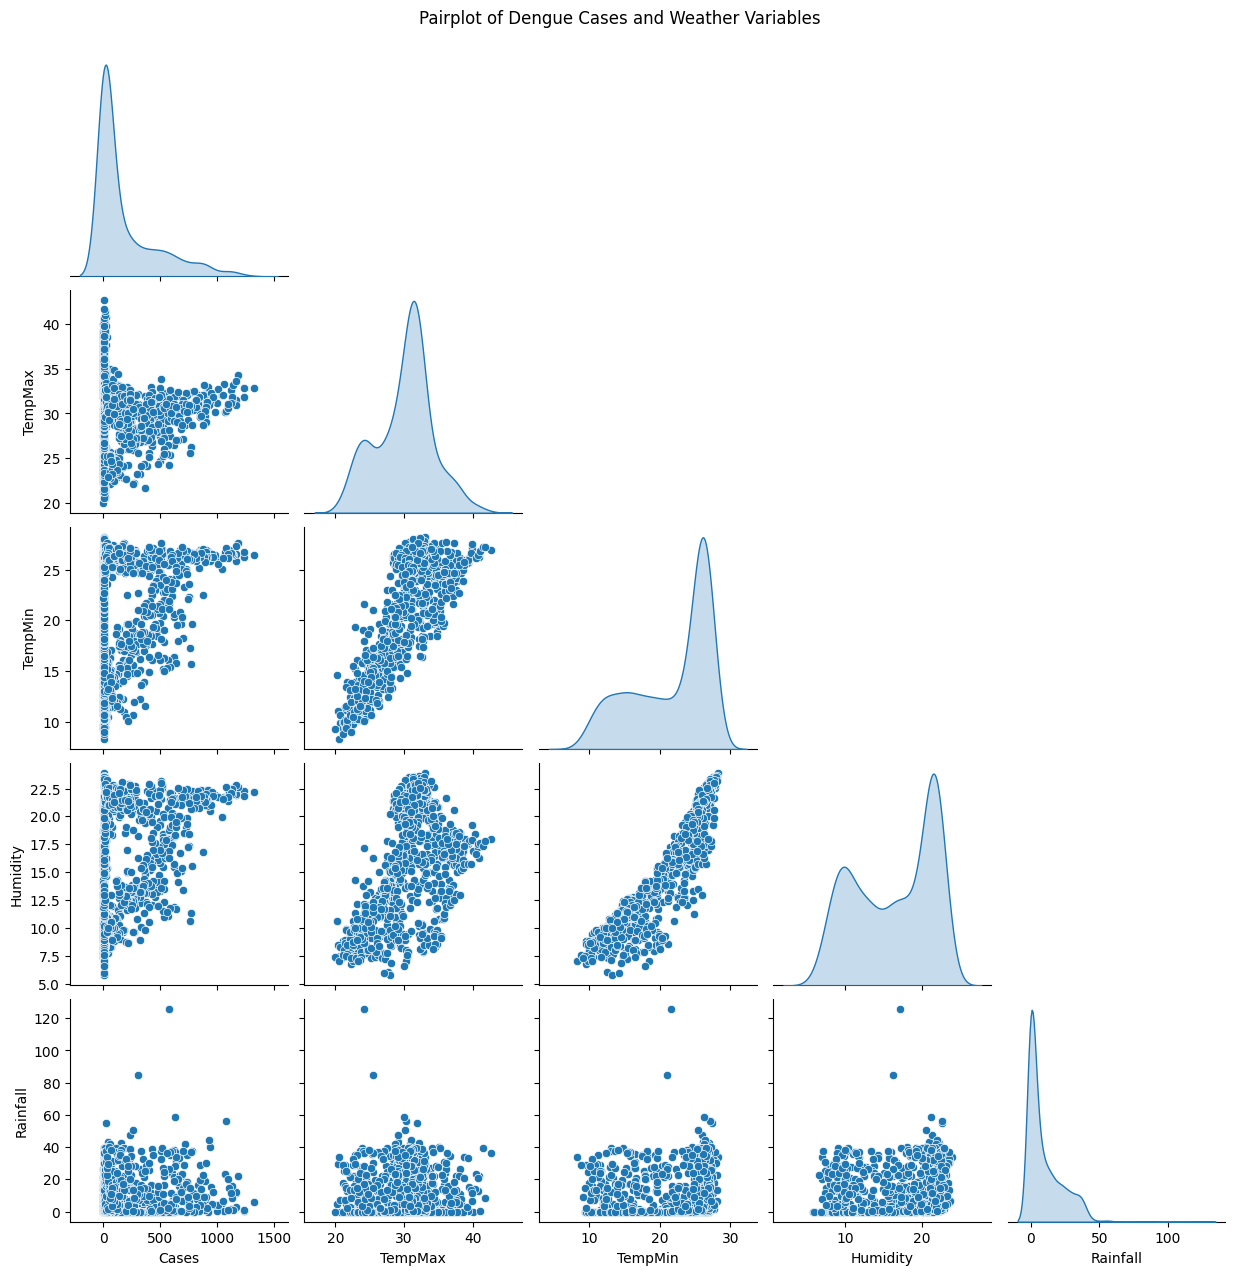

In [58]:
# Pairplot to explore variable relationships
sns.pairplot(df[['Cases', 'TempMax', 'TempMin', 'Humidity', 'Rainfall']], diag_kind='kde', corner=True)
plt.suptitle("Pairplot of Dengue Cases and Weather Variables", y=1.02)
plt.show()


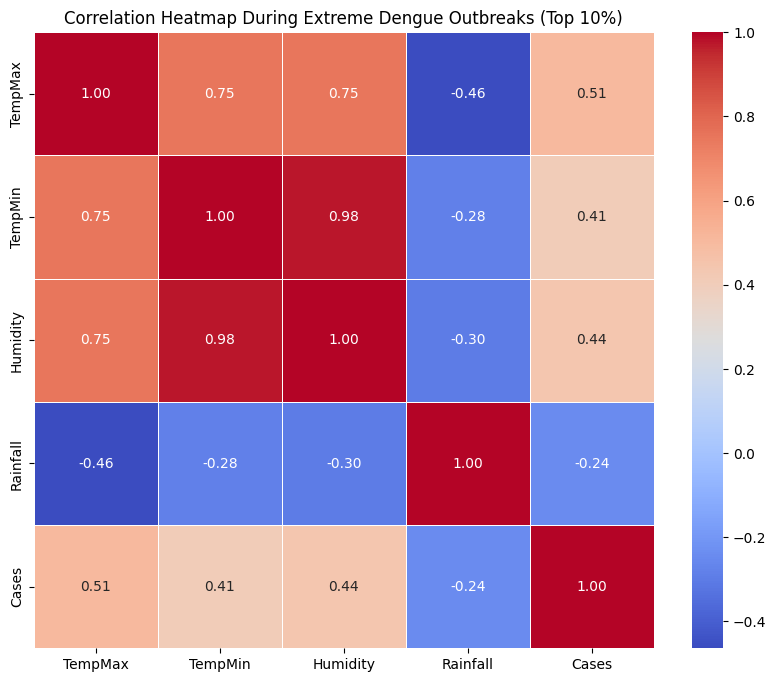

In [59]:
# Define extreme cases (e.g., top 10% of case counts)
threshold = df['Cases'].quantile(0.9)
extreme_cases_data = df[df['Cases'] >= threshold][['TempMax', 'TempMin', 'Humidity', 'Rainfall', 'Cases']]

# Correlation matrix for extreme cases
correlation_matrix_extreme = extreme_cases_data.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_extreme, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap During Extreme Dengue Outbreaks (Top 10%)")
plt.show()


In [60]:
import plotly.express as px

# Interactive scatter plot for dengue cases and rainfall
fig = px.scatter(df, x='Rainfall', y='Cases', size='Humidity', color='TempMax',
                 labels={'Rainfall': 'Rainfall (mm)', 'Cases': 'Dengue Cases'},
                 title="Interactive Correlation: Dengue Cases vs Rainfall")
fig.update_traces(marker=dict(opacity=0.7, line=dict(width=1, color='black')))
fig.show()


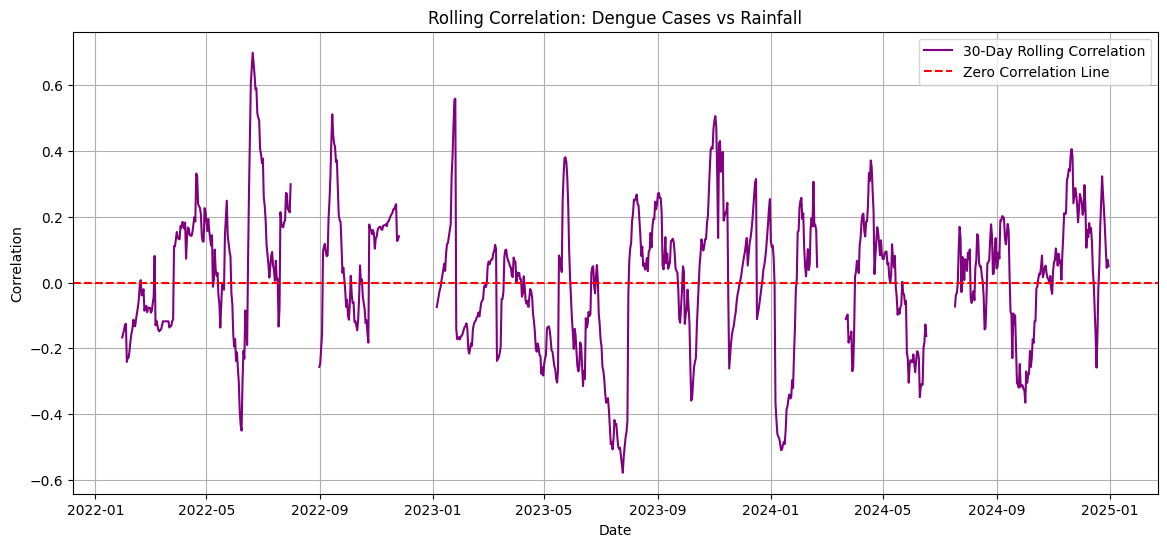

In [61]:
# Rolling correlation for Cases and Rainfall
rolling_window = 30
df['Rolling_Correlation'] = df['Cases'].rolling(rolling_window).corr(df['Rainfall'])

# Plot rolling correlation
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Rolling_Correlation'], color='purple', label='30-Day Rolling Correlation')
plt.axhline(y=0, color='red', linestyle='--', label='Zero Correlation Line')
plt.title("Rolling Correlation: Dengue Cases vs Rainfall")
plt.xlabel("Date")
plt.ylabel("Correlation")
plt.legend()
plt.grid()
plt.show()


<ipython-input-64-53b1530089c6>:27: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




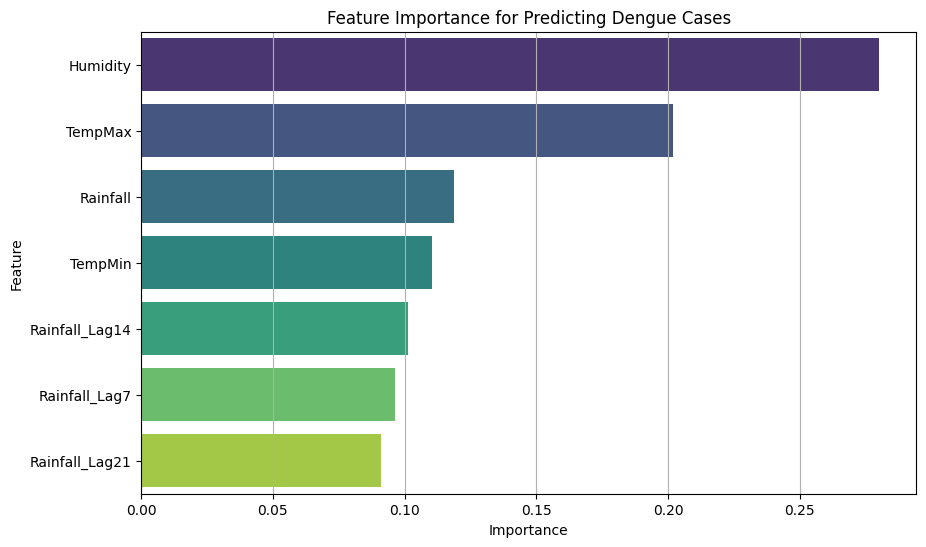

In [64]:
from sklearn.ensemble import RandomForestRegressor

# Define features and target
features = df[['TempMax', 'TempMin', 'Humidity', 'Rainfall', 'Rainfall_Lag7', 'Rainfall_Lag14', 'Rainfall_Lag21']]
target = df['Cases']

# Drop rows with NaN values in either features or target
features = features.dropna()  # Remove rows with NaNs in features
target = target[features.index]  # Select target values corresponding to the remaining features

# Drop rows with NaN values in the target
# This is the key change: remove rows where 'Cases' (target) has NaNs
target = target.dropna()
# Filter features to keep only the rows with non-NaN target values
features = features.loc[target.index]

# Train a Random Forest model for feature importance
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(features, target)

# Extract feature importance
feature_importances = model.feature_importances_
importance_df = pd.DataFrame({'Feature': features.columns, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title("Feature Importance for Predicting Dengue Cases")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.grid(axis='x')
plt.show()

In [65]:
# Save the enhanced dataset to a CSV file
df.to_csv("Enhanced_Dhaka_Dengue_Dataset.csv", index=False)
print("Enhanced dataset saved successfully!")


Enhanced dataset saved successfully!


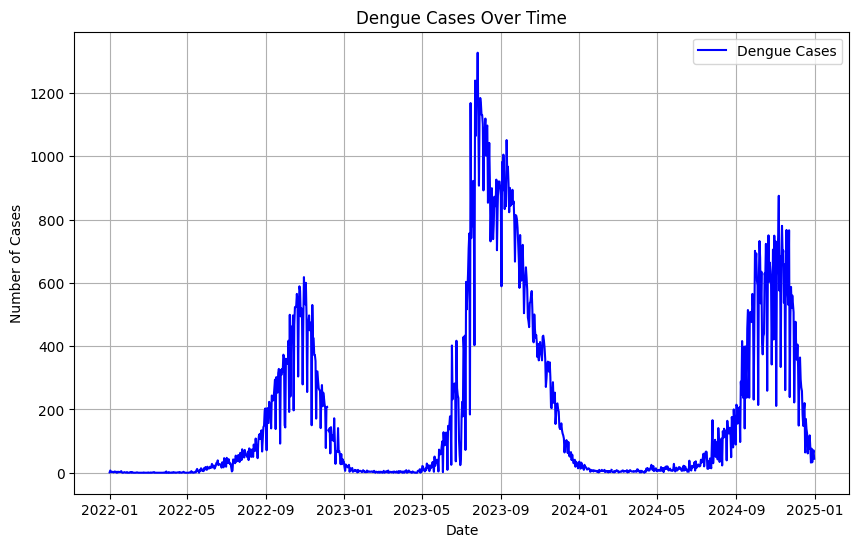

Visualization saved successfully!


In [66]:
# Save a plot as an image
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Cases'], label="Dengue Cases", color='blue')
plt.title("Dengue Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.legend()
plt.grid()
plt.savefig("Dengue_Cases_Over_Time.png")  # Save the plot as PNG
plt.show()
print("Visualization saved successfully!")


In [67]:
import joblib

# Save the model
joblib.dump(model, "dengue_prediction_model.pkl")
print("Model saved successfully!")

# To load the model later
loaded_model = joblib.load("dengue_prediction_model.pkl")


Model saved successfully!


In [69]:
!git init

hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/.git/


In [71]:
!git add .

In [72]:
# Save the dataset as a CSV
df.to_csv("Enhanced_Dhaka_Dengue_Dataset.csv", index=False)
print("Dataset saved successfully!")


Dataset saved successfully!


In [73]:
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Cases'], label="Dengue Cases", color='blue')
plt.title("Dengue Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.legend()
plt.grid()
plt.savefig("Dengue_Cases_Over_Time.png")  # Save as PNG
plt.close()  # Close the plot to avoid overwriting


In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define plotting functions
def plot_correlation_heatmap():
    """Plots the correlation heatmap."""
    # Compute correlation matrix, selecting only numerical columns
    corr_matrix = df.select_dtypes(include=['number']).corr()  # Select numerical columns only

    # Plot heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt='.2f', vmin=-1, vmax=1)
    plt.title("Correlation Heatmap")

# ... (Rest of your code remains the same) ...

In [78]:
import joblib

# Save the model
joblib.dump(model, "Dengue_Cases_Model.pkl")
print("Model saved successfully!")

# Load the model later
loaded_model = joblib.load("Dengue_Cases_Model.pkl")


Model saved successfully!


In [79]:
import os
import zipfile

# Specify folder containing files
output_folder = "Project_Files"
zip_filename = "Dengue_Research_Project.zip"

# Create a zip file
with zipfile.ZipFile(zip_filename, 'w') as zipf:
    for root, dirs, files in os.walk(output_folder):
        for file in files:
            zipf.write(os.path.join(root, file), os.path.relpath(os.path.join(root, file), output_folder))

print(f"Project files successfully saved to {zip_filename}!")


Project files successfully saved to Dengue_Research_Project.zip!


In [85]:
plots = [
    ("Correlation Heatmap", plot_correlation_heatmap),
    ("Seasonal Trends", plot_seasonal_trends),
    ("Time-Series", plot_time_series),
    ("Predicted vs Actual", plot_predicted_vs_actual),
    ("Residual Analysis", plot_residual_analysis)
]

for filename, plot_function in plots:
    plot_function()  # Call the plot function
    plt.savefig(f"{filename}.png")  # Save as PNG file
    plt.close()  # Close the plot


<ipython-input-75-2511fcb6dd38>:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ... (your other plotting functions remain the same) ...

def plot_seasonal_trends():
    """Plots seasonal trends using a boxplot."""
    # Create a new column for 'Month' if not already present
    df['Month'] = pd.to_datetime(df['Date']).dt.month

    # Seasonal boxplot with updated hue and legend
    plt.figure(figsize=(12, 6))
    sns.boxplot(x="Month", y="Cases", data=df, hue="Month", palette="coolwarm", legend=False)  # Assign 'Month' to hue, set legend=False
    plt.title("Monthly Distribution of Dengue Cases")
    plt.xlabel("Month")
    plt.ylabel("Number of Cases")
    plt.grid()

# ... (Rest of your code remains the same) ...